# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [1]:
import base64
with open("test4.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

FileNotFoundError: [Errno 2] No such file or directory: 'test4.jpg'

In [2]:
# @title
imgstring="""/9j/4AAQSkZJRgABAQAAAQABAAD/4QAqRXhpZgAASUkqAAgAAAABADEBAgAHAAAAGgAAAAAAAABHb29nbGUAAP/bAIQAAwICCgoKCAoICggICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICggICAgJCQkIBw0NCggNBwgJCAEDBAQGBQYKBgYKDQ0KDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0N/8AAEQgBVQIAAwERAAIRAQMRAf/EABwAAAEFAQEBAAAAAAAAAAAAAAMBAgQFBgcACP/EAEYQAAEDAgQDBQUGBAQFAgcAAAEAAgMEEQUSITEGQVETImFxgQcyQpGhFCNSscHRFWLh8CQzcvEINENTgnOSFjVEY6Kjsv/EABsBAAIDAQEBAAAAAAAAAAAAAAIDAAEEBQYH/8QANBEAAgIBBAEDAwMEAgEEAwAAAAECEQMEEiExEwUiQTJRYRRxgSNCkaEzscEkYvDxFUPR/9oADAMBAAIRAxEAPwD4gJX0A8222BlKFsJNkeQJTCE7NDVsliOiVyRdiBiUok3CSN00VSRaK6Nne9Vk2+4a3wbjAo9F28MeDnzLJ61NcCEyPIUIV2RZmoGgkyrqGLLJWaIsYGqVwW0PDFKBs85ipqglIG1UXYQBBsBo8SoShHPULEsoQaULIesqLsI1isliOVFDFSLQwtVMIRyEJAyf71QssUImUI5AyxllEQUMRMh6RltL28R+iUx8IECYAa/U/wB6rJOSiakiKQTtt1WRtyY1EmKh2/XRGoopstKHC73s7Xo1hd9SLBbMeO+hUmSDw9tmJ3929ib+ATFiVlOddC1WFC4YAHHoOXmUcsW7gHfwRcTwB2xsBfTKB8r76eSXlwVEkchQVWDAXJvfxN1zpYaNClZWT4br+mqT4hm4Y+h80OyiXZHlNkDdEokU+JELRjzULlCy3iqQ4LZGW8xuDiyBXLNkVDo8oFS7hBEuXRoKMrpQMUictiFMEUDDQGQICwd/71S7DFa5WUxQjQJ4lW2EgZKWWJmUINKhAbmpbLQJzUIQF7UDDQLKgoI14evQtnNdoY+RAy0wLZEG5IJhoyiTti2ghaE5oqgJS2gkhsgSWGiuhPeWZdjX0bzAW3C7WB8HNyFjLFoVqEER7OqFjCJUJLLRCcEmhwyRipou2NaqRKElVNhIj2S2WEBULPFUyAyhIPBURDxChDyqiCgoiHnIWRRYIoLCQhKplg3FCWhqouxt1ARr3IWw0hrXIWwh4fof7/soHKxigxsdK4nQXPS+g8ylJSfRotIN/BGk3leDb4WageAO1/mo8Sv3Bbi0p8MB91tgOZCcsUfgFzYlThbet3eA0+iW8avgilYSMyWs1uvL++iak10XSfYNmGybvdYHdrRa/hmPeV3L5B4+AlPDlBy2b1I1+p1JVxlQLVgaiq10u7oN7/P8wrlO+ylGiiq4XOJuLa3PT+qwTsbFoimK2/zQJDAbYOo/vqo4kshVFIDpZIlFMtMrpqLpyWVwobYyJ5ajjNoqSTJD58ya5WJqglIxHBciZl5TMXRgjK+SZdPsXQllAgcgVMhFckMNCCVWpIJoeHokwRSVGUDuqDEUIISqZBCgCsC8qnwEgDylssGVVFmucN135OjnXYGS/okuVjOKIbyVndjFQeFyONgMkh6fbF8ME4oXZYjyly6CRXw+96rPHsNvg3/D2y7mHo52TstJVpEckKUqpBIgzJDGoiOKS2NGuUICchCsE4oWyxtkpkFKsIbmVNkBuKCyz0blEQOCisoGXILLoY0qrLocXqmyA3SIbCoZmV2SjxKoo8QpwQY4IGWhpag5GE2nwrS79ByHMq2HFCGjzEC1v0HMpDi2zWqJzqEjQi1/daBqR1I3131Tdrj0DwWOGYH197k0W0802EHIFtF7SYRewN3X+Ebnz6LVDGhDkWVPg7Bo5gcdgBsD06XHVN8aA3AK+INuXWAAsGj8r6XPiSlZFtQyLso5Rm7zrm3wjRrR/MeZPmVm7YVEOti1OltO60AaDl5eu/qlSdug0iJM3J5m43u4fLUDy0RL2BNEJ7dgNdNbXGvO5QSW4nQEYPcXIHly1KDwk3ApKbcH08OiFwCTK+XD7/M/olvGEmVjICCQeWn7LG1TpjbIs8PNKcSkyDI2xSnwHtsssNkB0XQwSRkyRaNFHTLqKP2MW4RzLKUCMzKmQBLKlthpEGWVZpMclYISJSfIdB4inxYtoKSmWCMzKWWIXILLoYXqmy0hrnobCoE9ypssGVVkGlDYSNo6FelcLOXYv2dVsQO4jPpAlPGhimN7IBBVF3YQN+SNIXVDS1RhWClalNBogx+8snyG+jbcPP0XZwdGHIi2e5abM9kaQbqmEirnf8lnkPiRnzJVhI8x6uLINmQyYSI+ZKCHXVkGkqMuwaWyWIWqUEmI0IaLY8uVgg3FAwkJnVLksaXoSDSVC7EBULHK6J2IXobJQjWk7KqcnwRGnwrA8ozP1cRoFtjiVE3clpFgJNi7nv0Hn4DpzR+IapBpsLy6NG/Xd3ieg8Evx0HuFlw3L/M86k8z5dB+it4yk7LHDcMNrN5+8eQ/lHMnqjxxcegJFuyltozU2IJ8dz5AdeXyvoWMS5Hqi0bWnXY6/E+3IA7NvzR7dpadlFVT53DNqSe63kB111Prus+RbhvKIcrDms2ziPkD18AOthdZYx5DBVmG620J5u6a7gcvW6N475KTK6ojF7NGvNx1PTQWslSVBckapIb3RqSfXXmfBAq6LQ009tCQLDXVM28kZDqIbkW1tp6cklx5CUgsNDcX68vFNjD5BcqKuvwo3udismfBbsZDIVtfh+l1jniaQ1TM9VsWGURqZGjdbZKi6ZbVo1GDYvcAHddzT5rVM52XH9ixlW1qzMuCFM9ZpBkGaRZpMaiK9LGpUKwKimHaU6PQNHnSIrsGhhehsNCGRBuRdjS5TdZLGOeoWIChZBhKoKhj3KFnQJd+S9ZJ0ccYHIUyqByuS5BURHJLYaChRFMaVGUDe3+iTIYirJ1WJvkd8Gt4fkXVwyMORF8CugkZKI8r90uTGJFTUFZ5IepEGUrO+BsWMbMg3lOI/trq7JVA1LDFzq7IeBVEEVEYoR2D0eLULRdjboKJYxwQNBoY5VRYllKIeeVKLQxLYQ/KiBGEqEs13COB3s87Dl1P9F09Nh4sRKVm8iwS5BI1tci219Gtt1JWnaWmXcfDlm5njxttc+f7bJqjwUplLXUhLthqL8x+eoH1Wea54HqQD+Dk3J6gud+TR59eiXtbDUqJ7DkY46Bx25WHID906MeBblYlNGGWzauNja9xbcX6257b80tTYFWyuqp3Pc4m+psD+3ING+3zQttjkqItHRXJ0118yNySflptZVGLbLlMkGjDTZu5vf5fkEycNrK3WQqml6XAJtfnoNbDx1PqlyjzwS6KSviIL7DYgXPjt581jyJjoSGQ4drrzt3utj9B5IccOSTkNrqU2OgOoANuSdNV0LUrGiD6aI4wvlkbHvo+n99E3al0Cn9yHUAkEaXHXa4WeasLghS092n8vzStiaCXBjcVpbEri54U6N0XwUUrbErmzVMeuhGz2OiuMmmLlFM1GH1uYDyXcx5bVGDJGh86tikQJWpEh6BhqBIIWyKimIXoSJAnSIW6CG51VlUeD0XBKPF6loiQMvVOQVCZ1VkoG+RC5FpAnyoNwVHSJGr2LRxRpal0QA8oJBoEWpDCFRIgijKI7nJLDK6U6rFLs0Lo03D710sL4MWU08ZXTizCyLUtQyQxMrJGrOGiNLCkSiORXTsN1knwNTEicqjIughcnIlCteoTaLdWUecoUea5QgQqEBOcqsgtkAQMhQsTKqIIqII1qqiD1KJfJ6JlyANzp81aVkkdj4ZoWtDdO7EAT/M79STp4LvYvpozNUb3h7BnEZi3V5LgDy5AnyB9E2CFtk2ow+7gD3mt3HInkPLr1VtETK3FsGBNwddyeZ6kcwBsOiW4DYyIbcM7p9T5H+/zVKPAW/kz+JkAAEgl2np0S5MKPYlBRlzjuXHQ2P1vt0F90tRHdD6um0AvoLk9PEeZtz5IpR4A3DIobN0953PawOgAA5fQJkI0im7I9XEBlDRuPesR+fX80Ml9y0Vte63pcA9NrlJlwMirKRwzH+UEOcfxOGhA62v6LNJbhjVEuCnOgtqTex0TYY2hbkFFGT73LbkE7aLcq6BCgNySL+I3VVRe6wrKC/TxH7JijYpyoj1VG239/wBlDKBIzKSopRyNj1BuD5hZmh+4zuN0F9xrblsVzc2K+TVCZi66L6Lh5YUbYMrpRqsrGMm4RW5T4FaNPPkz5Yl9NMuq38mBKmQpZUlyHDO1VJkoQyobLSAvmQNhUBfMgbCSGCRVYQ/t0Vg0I6qCpyJRHfWJe4JIC6vU3FuIB9egcglEA+uQbgqOwPf+a922efELkLZKPCNVVlXQyViGUEXGVkVxSXwMYjnqiIY9iBhplXUjVYZLkeujRcProadGTIaqlbourFcGB9i1MWikl8ETKmZiztUPiwRCWHZDngWecLDUiKYUnZQakR5ULsamDZIlqRZIY+6enYtjnKMiGhUmRj7omwUMSyxwVkGuKhYMlAEeBUIOUIML0N8kLvgyizzMHIXceey1aaG6QM3R2zh/BwG3PN13Ho0a6ePIeK7UY0ZpSs6Vw7Tuc06ZBtc8m/vb5JhnbC1dK0nKz3Ru46XP7KEVkV+EjkQb7uO1ugCpsLdyUOORC2RvW5Oo2523QyfA2CtmVmoBpubWvpy3A9NrLNsH9B6OmOtuuvd1/PSwTowopyIuIQbaaEi+m4Gw3580ErsKHJDfIddDp4aabAb8t1W5jaSK+vY82IB0GlwddtTf6Jc2wkisbg75LlxIHQaXJN997X1OyVGDkFaiiyZw5sNgANNvT9VpjgoU8lliMIIOo1sP0/2+aftozSkS/wD4bvv6fmptKU6GOwYAanUKbEU8llbVi3n+ap+3gtNmarp/RZJzofFWUlXNz+Y/VZXJDUiuq3B2/oUmUrQ5IyGKUepXHzxNUGZuuZZcvIqHpkUOSIypjGrLmOuuAulHJaMbhyR5KtC5FqII1iDfQVA34gq3lpAH16BzCoC6uQORaiNNcq3sm0G7EEbmXQF9cluRNoB1YhsJRBuqVTYdDDMpZKQ3tFVl0d1DV79cnmB2RHtJYxzrJbdE7IskiS5WGojHOS2whGlURsKI0e0Ep6sarDPs1R6NLwxBddPTow53RsGU1guslSOe2AqFTDRVVbViyD4kAuSA6HOCuiAJY0DQaIskKzyQ1MhSwpEkMPRyKoui5INmRbgEhzQjRKFIREo8QgaJQ1yolDCqsIahDFChTHFXRVoC5Cwoqzo3shw4HtpDuAGt8zuuno063GXK+aO28OYbfKB5nppzt05+i675M1nQaWlAba3UDT5k/oFPgW+yNBgbnaDQKUXZLmwggGwP9+J0H5qcfIC5MlibW7NBc8nltfxPO3S9kDNcOCAzhQ89XHoCSSfHmqSsuUqHzYJlGUCw3PW3X16lHVApqQKTA737th16m3L9SFGNTSA4bwnfvOBDdgNfU/sqikSU7PP4WBvpYX+fh6dUWxMHez0fDova22psNPAKttdAufyTIeF9bnXUm1kxIS52Edw/rrcqNWLsSrp7Dp6ItvBdmZrqT/dLYxGcxKDr8+aU0NRlMQpgfPksWSNmqLM9XUawuDGoqpY7JLtB2UmJjfyusWbo0QRkMSXGyGuKITFloYDqaiyapUA42QjXqOZW0GaxVuC2g3VSqybQbqhSy9onaqrLqj3aKWWNVEo92asgoiUoloUQq9rKbHtp0Wxg2KKdTaSzubCvfnmx73qNlUQ5nJEg0iOlJBWFDEaRLPMjUooeVTKKWs3WCa9xpT4NbwlZdjTI5uY1kpXTfRkRVyyLO2ORAqCkMaiGQlDD10PRBj0LLRElKTYaIr0ifI1MH2aDaM3D2NVqILDAJoAzOgZYwyIZMJHg5Ai6PEqyUCc9UEeEqqyCmZVZVIGXKm6Lj2dn9mNNaniA3kkLnfkPovQaSO3EYJfWd54VoOdtNvHwW0zyNjDR5j4aa/orFWWJwzbl5f0UKsK3hjN7xNuiBoLdRJj4TjaNGj5BRUTewM/DoGwF/KyJFORUVnCwsb2ve/nbr1RsFZCp/gevh+/7qcIcp2HloRbbwA/RU2g0RP4IP38fDwChVjY8OA2VoBuxHU2quxaZEqY1dhFRXt6oWGZXEo0Fj4oyuJSIJDqMtXW12WSQ1GerpVjmxyKGsl3WGb4GJFDXzaLnZZGqBlsSGq5MzZEgxBISZGRMWboPNEyIqA1QgoYpRe4cI0VE3CiFFtJuCNplNoNj20ivYVuHto0axguQZtCmeIFzCsoEaxA7wrcPRrEybwrcORrEytw/+HK/EDvOouuvVHHoE56BkAPKTJhJsZ2qVuotqzzahGpFUSGuumLkgjlJKiFHXHVc7J9RpiuDS8KVC6umZgzRNkTouq+jn/JW1D0hsaiBPIlNj0iI9/yWexlHmlUVQx7kLCRGlCUwyOY0poM8QoQQvQ2Q8ZVNxYF70LkXQ0OQsugmZQgwyoLDBPehbLoC+VBuL2iGZSyqGvnUTt0XVcn0N7OYB2dL4DMflp9V6bTv2Uc/Iqdn0JgNNZo8h8yti5MMmaWkjVMpclrTNVWXRaU8aohLjYoLaAyRK7K2kKppro0ytpXPoQrDTIs1GAqoZbKisarIQnN/2RUWClHkpRRX1T/VDREUleN1aQ20jLYo7wQsbFmQxl6TIfExuIPWGTNEUUFc5ZZjUUVW5c7I+BqRSVq5eRmiKM/Wt1WCbNKIAGqWrLBVkNwnJWwHwiE2hTvEBvCNw9GsIO4K3DkfhK3j24crWEreHZhqasILmSI8MTFhA8hJZhacsIPkDjDfBM8aAcwjcOVrGgd48UKLbRe4UUivaTcK6kVbSbjZvauzL8GCyO8BLotEWaRZpuhqIUkiytjKEgBUhbKaLSALfChA57lJNEM9ibtVy8r5Ncbou+FpdV0dLLgx5kbY1Gi6+7g5tclXVTrNKQ9RIEtSs0pGmKAdsgUkShzZUdkEe5C2SgJcltkGkoGxiBPSyAnFCwwXaIGy0hC9LsOhoeq3F0edKpZVAXSobDoG6ZC5BJAnPSmw6E7RTcVQN8qilyW1wfRHsjfdlOTsBZem0t7TnZj6awhujfRdOJypdl/TtUkSJa07EAZYQqFNkrMoDYJ5Ql8gJXI0SiBUuTETgr6lysiZS1blQbITnIkCQ5HKyyvqJENlxX3KitnUCoy2JPVMbFfYyeKtulMd0Y/FGLJOJogzM4gufkNEUUFUuZNjyoqXLm5GPiVFTGskqHp2V1THYhAEMibchOwq5AT6LZmFrtxwqjnOYVuGo/EDuCNoAiWMpyCCgReMrcPFEpsK3BGUiLaVYQwKEF7NQgpiUog0xqUQURK6IK6JQsvnFdBmQiTTJUpcDEiC+W6xSlYxCZUNBWSYGJ8IinIO56b0AAL0tuxiKTEn6rn5TVDoueGHrfpjJlRrZH6LqfBipFXUzLJJjIor5ZVmbNNAw9CuCNBRKmKQNHu2QuRKBumQbi0hhnS3ILaBfUoNwSiBkqUDkMUQTp0lyCoYZlbnRaQhqgh8iC2gn1oQuZW0C+tCBzDoA7EQlOYSiAfigQbwmgD8XQ7y0iPJi6kZ8oJRPqz2HU94IXeAI9SF7fSr+nZw8791H0tgh7oXQicyZpIGqpApljTlAORYxclAQpcoSiPPIoSmQaio+f0TEi6IUz/HkioGiFM5XRVlRUSKxjK6ap6IkCitnl8VA0V9RKhoNFPXTdFVDKM9iMl1KLToztaN0DiMTsyOMHdYshogZauK5mRmpGerVycg+JUTlYpIciBUNWaUQ1wQK6PRIkqGoi0I74T8Ce5C8z9pto6XT0Xq1j9qOK2PFKi2A2edTKnBl2eNMh2MliOp1dUXYzIgDR5wQ0UJkVqJB4iV0iHuyVUSxzIUaiSxXQbo9oNhZatFOaBUSDNOsM5j0gDXJKbZfRIYncgtk2nWiAiQ6YI2kREdzwltpDUjO4pUarlZZe42QSotuG51t08jPlSZqZK7RdVz4MO1WVFVVrnzmPUbIxqAkqaGqIoqAi3oqgclYELyIJRZHOIBJeUJQGOxMJflC2EeTFggeVBqBFkxgJTyjNhGfjKW8pNgB+NeKHyjFAC/G1Tyl7SM/Gkt5QlAA7F0HkC2AnYmo8hNgJ+IFL3F7ARqyqcglEaZiqsKjzCUyH1IGXR9t+wOP/Cx9Q1gHyX0LSf8aPL6le4+g8COlluRzTU0z/yULRYxOS2MRKZMqSIwhnTEgCJU1Cui1Ir31SOi2AkddWkC5EGpKIFMpat6lIbZXVTwFAUymq6tXQ9KytnqlQaRUVtX4oWxiKaqkQ7iq5KeuKCUvkbZkcUC5877NUWjKYgudlZpRn65cfIaEU8gWOTGpkWRIfIRFnbohYaIuDxXlaPFN00bkhWd+03zYV6+vajhSdsKIUSRBTAiaKsR0CGi7BuhQNBAHQJbiGmebAoolbggp0WxE3HjCq2oljciFli5FaJYpbujBKF1cFynM2bSO/EAlOaDUQQxcIfMkFtGvx4KeYrxno+JUa1FFeIZUcTeKj1KLWErp+I/FZZagYsJVS4tcrH5dzNGxJGmwTEwLLpYcm0xZIFlU4+FonqKQuOMqJ8fWGWazQsVESTiBJ8ozYAdxF4qecniAP4gS3lsPYAdjaDyBKAJ+MKvIXsAvxMoHMLaDdXFDvLoG6pKFtl0J2hVWy6PXKq2Sj2RXTZXQvZIlEljhCr2srcPbArUGTcFbTI9hTkPbSJixg7g8FGnRx8pi5SPtD/h1mzQAH8IHyC9tpf+NHn9T3Z3fBHbfJbrOcamlKlkRZRuVBBzIoiEWSsCYgGrK+oxFFREiuOI6oxm1hftSlC2gE06lAoo66dSkNSKatq0VBpKzN1+KoGzTGJTT4qlSlQai2Vs+KJbdhbWRRNdWky6ohV0ht3fzSsqfwEq+TOVsZ5rK7qhqoyeLNXKy8GqKMzWLlzRpiyulasrQVkKVqS+BhEmSmEh3DUd5R4XK26KNzEah+03wiXq11RxE+RwYoiWPsiuyDCxC+CDDGhoJAyxLaLs81qKyMeAiBoa+NTaiIH2SCgrFEalEsR8W/qqJZyKXGyvJPMdxYyK/FykvKxqggJxIofIwtiBurChc2TYhv2oqtzJsQjqgqtzJtQwvUCSQgKrotk2nryE5ZGhLgh0uJEq3kbIoIAagoNzDpDC4oHZKQllZdnsilEtCiNXTJwOEKvaC2hwgV7GVuHtgV7Cbhwp1ewm4eymVqAO8K2lTfEVvCCjRLGwd4VmHpixMreg7MMTVgYtzJEeFpq04PkJMeEpy04DyklmDeCdHTAPKSosGTlpwHlPoz/h3rsrch9F2sCpUczUcn0jg7N7dea2HLs0tGoMTJzndFAitrsQtzRrgLbZna3iHorHrGVsuNEplEcEDZiZvrdCVt4LGPEEVi9g11ddVZaiVFfVKWEomZxbEktzofGCMZiWJ6pbkaYwIQDndbKKFhOohPs1t0zYkhLnu4IE2KAcwPVLckvkYoWRXV19iPndKckyONECoYUqSQSZmcXgXOzRRpiZSrZuuNkRoiytkWSQRCmCzsYV9QlMYibwkz730uuloF7zJqXwbsNXp0cd8DmsVso85qqiCAKUSxzo1dA2BdEgcQ0xnZoKC3HgFaJY7IiKsTIoQUBQnIj26HyP5K3RLPn6y+fUz1J6yuiC5VdEFDFKKFEarayhezV0SxRGpRLF7FEkVY9tOmKJTYQUymwrcObSotjKsIKVXsZVjvsivxlbhfsitY2VuCNokxYmwXIOzDz0TVgYG8I3DT0TFgf2K3hWYYiWnZXkRIjwlOWmYDyEmLBk6OmFvISI8FTlpgPISGYGnLTg+SiTHgngmLTgvKS48G8E5YRbyEmPBvBEsSBeQOzCPBGsSQG+yTHhXgjWNAuQUYd4ItlAbjeeyys7OVvnb0KbHgGXJ9Y8NuuL9VqRzZGnpmqFx5FqquwOwsrNbxUuDGYzi463v02Qt8jVCjMuqjf3SmJjn0F/inRo81bkxW2wkFTfdRP7lOLiWMQva2isH9w0sCAWU2JCwUsdFGDxl511SpdmqK45M6+l1uUNB7vsP7S37I9/2F7b7IrnEnmVFb7L4SPQcP5jcjRX4oyKeVoJNwswcreV1X6ZfAvzsqMQwJw925HTVZMuJro0Y532ZXEyRodwudktLk1qmZKuduuRkaYyirmWOQxEKVqQxkUVs5Wduxqou+DaPvF3XS67mgx07ZztY+Kj2bRjV6BUzlSuuQmVXRViFiIljRGqoljw1XROxpjV7SqPGFC4lgnQoKLPdirolnuzUolg8iFhpniz9VKLOAdgvBbWem3CiFTaytw4U6NQB3DxSovGynII2lRrEwbCtokxYgd4QUKPwk3jxQoo47Bcw8WHp6wAbw7cPTFgYLmP/hivwleQNHhiasAHlCtwlMWnKeQLHg6atML8pKjwVOWmBeQlR4MmrTi3kJceBp8dOA8hIiwNMWAB5CdFgaasIt5A7cETPCD5AjcIReOivIGbhaBwK3WGZhyNR4A3Bm0KvYVYUUaPYSx4pFe0HcPbSqqKbHGmVUVZZYEzK9p/u6qURkZH1jwJPeJh6gXTEY5mvfUhoClh4lyU9RK4k5gAOQJ387Ibs3W2itmpAdwCnpNCZzaBvoR0ACdFv7GfyNlXWUYCNxsOM2iE1qW8YfkZYUTkFUXvLB79EAK5M7jb9ClyZsgYDFpEjdyOZRVFSAETYCI9JJfyWnDBPsXOTJklY1g1ICdOorhCkpMjT8RfhDiPBuiWpS+Ijlj+4FmPDnmHmP2V75LtEcF8Bv4kHBLnyWlRm8eo2n+i5mbFuRpxyOf4pS2PqvOZ4bWdGLsqjCs220Rsr6gLHLjgYmVMh38Fn65GpWXeGVBIAZ3WDc8ytuPUNqhEsSu2W1LUljhrpzC2afPKMqEZMKkmaTKvTRlZxGqFAVrsuxA1EVVjVTdFqJ7Mq3F0PCKymIQqZS7EDVRGKQiKTBvYgaGIC4IGg7OLNw9eWWA7zkFbhqPwgOdBmYYiWAHeggwxMWApyHsw1NWAHeg7MPTFhKc0HGFpvgsW5hWYT4JkdOB5CVHhKcsNAOZJZhSYsQtzDNwdH4Uwd5IhwbwWiGEBzJbMGTfCL8geLBvBTxUC8hMiwdMjjAeQkswdM8YKyB2YUjUAXIkR4cqoHeSYqJMSoFyJBoUQO4BJSeCCRExn2ZKaGJjm06tBWF+zIgLFbSqUUK6lUII2JUQI2FVQLlxR2rgv/h97anbM572yPGZjW2ygbi/M3SpyoPGjovs7wx0bDG/3o3Fp8ehV4mIz8M0FW83sP9kySsPGAnmt5q4xNFmexTH2subiw3N1p3qPDLWFy6MxNxhLKS2CMvtudrDqb7Dzt6olGb+kLx4sf1Pkoa7iGYHUwX5tEoJ+nPqFKfbkiex8pMJRcUH4xl5X3Hz/AHRqbYqWNdmlw/FtuaZLHfJnao0sOo0WGQKkUmO0uhSnCzdCaOa4wbX9UmWOuTQpp8IxuJVnz6K4xbDXA+nqiAABdzjZo6kro2oe19sX9b3PpD6jEY6dzGvb9qrJXBjY72jY53uhxJDWtHvF7nABoJ2CCLWJWlukxUpeRXF1Ff8ARmfadxlX0rhHUQR0okv2Z7ro5ALf5cjczJALjVrjus+o1OdLikHpvDmtxbaXZz+L2mT5gJBe5t3bN15ageG1lglqs64kjoqGN9GowXj4OcQ4FpG/X1GxHjugWtTe2ZTwfKL6sqbi41B9U1u1wAo0ZyujvfmuPmjbNMZFPJT2XNUKZe62VNbEsORcj48lK+HU+awSXJqiW0c+RhO55Dx/onp7YluO5gcFxEyEh24RaaTlILPj2ROhMboPIfkvbYlUTyWT6hbokymuTwVg7eRj2qhg0MUol0PDVZBqqiCtChTHFWADcVA0Bdz8igYxIwDMNWJYDc5khmFJ6wIW8hJZhPgmrCLeQK3CUXhK8gePBPBMWAF5B4wHwRvTgeQlw4F4JkcBTyE6PAfBPWBCnkDtwDwRPCkD5STFw+p4hfmDjAVfiK8hIhwYI1jA8hKZhA6Jm0DeGZg6vYVvF+wW5KbaJY/7IFRLF+zqE5GuhQFoY0IHIOg4RroU0BfElsYgZYqCscxqq0QKWpiaFsdlVWFyK6NQrkEYkIwI1qKPIr5Pr72IYyDS07XndpAPlyWXLV0aIxdcGhxHDw2Z5bs9rXHz2KuBkyNuXJWYnDY3T1yGnXBlMZr7ApvwaYcs4zxhxVkLnHvuadBoQCeTBfQ/icdgkvJFcy/g6CxuXCOZ8c4zWPp+1LnRw9o1rWMLsozbkC+ug3dub6LR482RKUnSfwY1lwRltSuX5MxxGKb7G6aOSp+0tLfu3yZmSZjYkAZS1zRqQ0WBstGs0WPHhUo3YrBmzPPtlW0gYBxTPAInNe6z8t4ZXZmkEiwAJzA9LfJZ46WUccZxTt/DNkpwlkcT6U4BxEytLbWLQCWndvPTq08iLrVjbSqRhzVVo6zwvBcAW1Q5YVyYG0W2M8O3akxotM41x1g2UnRVlXBvwvk5ZLSEvA6lVhjZsySpcFrxDEaVgfa8shbHCDsL3JeelkWWSjJL+4Rjl5XX27Be0TgVwoIZYrukjf20rgAXPzNIc43vfKTttZeg8MViVLk81p9b/wColjyfT8HGeKg+pZTCWQlkObs2CxyhzsztfEi/lYLla3Qw1Li5WqPRYMiwbtkeytZheeSNrdmkE7aBpJubddh113ssepxriMPg1Y5e1t9nQ6b2fktdJKMmg7MbOvvm6jTTXdYp6PHy32Ox5pUkGghLBYi46rJsaVGhtPoaKW6F4rQpyora+ksudngkhsJWZyuj3XDyI2QKuKDUrDXJqTHVUGYi2w+qpq+Bie0Lw7QZZCOpBWrR46nQvVZG4HQeyXs4o8q2MdAicS0x3ZKbSWhrokO0rdyII0VBPno88KnRYOyGmQI1iJIFiPYrKQFzEDQaGmHf++Sqg0yugwhbViBeQnR4IneJIU8oZuE+CtQQLmHZhKLagNxLhwxGooByZJbhITKQvyUPbh9lXBe+wraZToC2SYqYI7QDZKjpgjTQFjnwqOgrAliWwgjCrsjQ50qFyBoC+ZA2MiDLkO4OjzSrBHliuiWCdToXEvceDVCkI9qCgkCfGhLBhDQaYUBECx9ldFDwpRGhQ1EkC5C5VHxyDZ2/2XV7pKCVkZtLC85DzBOrVi1K9to7Gi2y4Z2SgMn3XbWMnZNDrXtm5/VFj6OfqUlK0S6yhuE6LMu9Mw2O4GTcAb7LSuUOxz5KCL2MRkO7YXc4ED+W/Pz0QLHB/Ub3mbW2JF4r9lrZKZ9ORoW2BDfdc3VrgPA/3qu9h1EJxUfseZzafJjyrJB/ufLmNcAVVO4sdTyPsT3o2F7Hi98w5tzcxbTktiyxqpcnSjeR7ui54V9llVO9kksDo4o7FvaWaTbZuo0AO51XOzahS4rhGrHhcLa5s+kPZT7NnRymad0d3R5WRsBcT5nQW9FhlPdyZsqcYUzsmCcJBpv1WfJk4Mie5l1iWGty8tkiEuRyRwv2jYRmJT5ys14kcjquH7OB5gpmGSiPndG8gpoZY2ioibIBbfdttiFocIy9/wAmGO5Pi0WxkgDcoDg21suhFunLTwTVqZR4JH02MnfF9/k5VxB7GqGR5cO0jubkRPDQTryIIHkEmepcuzo49PNcd/uLhnBdLT37GMXOpc8mRxPiTZZHlSNXjb+or8ZjL9Nh/eyW25BcRK9+FaWsraVCHJkGSiDeiS2lwL5bM3jQ3XI1SVG3EY/EG6rzeVc0dFdGdxKoIuBpdc3JKnRvwwvkhUVUQbJcZ+5DpwRrsKP3kZ8NV29Iv6tnO1PMTchy9XFHl2LZGDYuUKyxjowhaICLFKDTBvCBoYI0ICWPCIFi2RVZSPdkrpFWI+HQ+X6KNETLSHDfBdfYZZTomtoAi2it1nhQq9qL3hW4eptQO8I2jsrpEsI2JRgNg6iFKYaZG7JBQaYWIIkCwhmV7qLoa6dDuJtGFyGwqHNKjYIilFjXxoWWIGIbCTCNb0TUCx5CsXQ4NVFkaUIWWmNa1BYQQxK6suyNK1A+C49nmPVJ2FJBwUwBIaAqboM8XqrBoQSKXfBOjrn/AA6V/wB/Kw7OjzW5XaUEojcTcHaO7xVZ7Yg7AC3zSIDs6WzcaOKO6Po5rjwG/hjd7JqmRKgFZQhFb+DVB0Z7FX25B3n++6JP7I2Q2yMHjeNnXKy56gX25dLJvkm+EaYYINmZLZpXga7+6NvC56eSJRk+zVKWPGmdw4C4QMTQ6Q5pHAXPToB0AS8klHo81qcnkfBstlz5Ow8cEkVmJS3CuMqNSxo5lxbTblG8g+EDk2K1DbkaXuopUG4ErBa3ktcMvJkeKuUW1Xg+YXb8ls3pgwySgyiqcE11H1ISnFM6CzNoWLBm8x9SqWOIjJlb+RkvDw5NVNGbf9yrxDB7DUJTdBbrMJjrgLrlZpm3HExmKyaFc3LK0a4IydYdVwZu5GxLgzWON1B8bfRc7Pwzfp3cSuhPeCzr3Sv7D30bPAXXkb4WC7+jlckzman2pm9DF6+PJ5pysWyl8gditKslDiFdE6E7JSiWDfAqZLGdmgLTFDFYVnsqslihWCNkfv6oWy1E1Iau6YnyK4oGwKHMkUTBoeXIxdcjw9SwjygIhYqoOzwpULiUpAZ47JbGIr5UpjUeY0oaLZIbCmJAWKI1TKFCJEPXUKFchCTo9GFRJEpkaYhTCthUYNsjywqg7YxsSqi7YQsVkIdTEkzQyLIjIkEUNsPGxMAsIGqFDTGq2l2Bc1A1QS5Oof8ADsz/ABh/9J11c3UbDx8uj6PxTCsrmvHQXWeLNM1cKLmicrZzUiyiKCx6iJVQnkmRkAZ3E6Enl9FqjJDYtozruFi42PNaN6Q3y0jYcP8ACDY7GwzeSzSzMyznKRpDYBZZSsWkQJq1JbN2OP3IVZGbX5JZsVHPeLH6FRDdvyfMXH2Mujl8CVz556lR044bjZoeC8Tz6grr6eamcfURcDrWExXA+q2y46Obuss5sGB5eqtSK3NER2Cjn8k3eU7ZDrw0AoZTCWNswHFOJCxAWbJPg1Y8XJyjG6i5+a5GR2dSKSRlcTOnoudlfAa7MtM7Vcd9mn8Gcxh+Z2UctVzM7uRuxqkRKekIOvolpUx7NjwrEczfF113fT42zl618HRGtXs0qPKsZMxRqg0gIaqLHtcrsoXOpZVBLKyAy1SiDS1Rouz3ZqkgWzxjRUWiNPHv6oJIcjVErsGDodkQNA2eZGVaLbJTYUYkcI1CDHlVYQjJFW4pxDdsr3FJEOeS6S2MSoFHBdClYTZNhpU1QF7gz6ZMSAciFPGlS4GIG0IbDPFiplCFhQlj2BWXZIiciESHvlRFojvkQho8JFVkYx7lLKoG5VINCMjCWggjo0YAKyplodZSwhjo1HyUnydS/wCHZtqs/wDpOCVlXA/B9R9TVLs7coAvbKsePg3ZOEQMLOmu4uD5jROZzPktI3JbHImxuQkaGOpQU1TojQsdIByU8gtxY6aosqtsOMCmxDFFK4LWNWAiabX6i/ksc5UdXFi45GVnFoDcpsQPJV5LLeHng5PxpxELkjY8tPT9kqWZdI3Y8Srk4xjeEtmJJIJWSaT5Ne7bwZvAKr7LMASchNjfl0ITtLnUZ18GXVYt8bPpThiqDmgjmPovTSpq0eUknB0zUiMJDYSaZV4gLXQ2OSMTjMm6lmqKo5pxFJukTZqijB4ksUxyMzirlzM3Q6CMvOuK+x9coz9S3vE9Vy8z9x0IRtEijZcoocsOXBuuDsN1LumgXrfTMPyef9QyfCNU4L0ZwECDUHYyxxhV0SwboVVEGZVVBWFYiQJ4IqIKVZD2UKEFDlLIR5hv5FC0GmaZka61GKbJUcCuhQcUSugHIG6KyotDLqFgZigkWACWHYhlQ2WEgaiigWydHAnJUJcg2ayuwWwclQqtBRX3IkqXLkbEY1qGqLY50aooa4f7KBIaCoWPzqrBoR0qlkUQDygYZ5qiLH5FdFWKGqyCtjUoqx2VVQQhhUops82BFtBsV7FGqIuGaz2T1zmVkJaLlzspHUFLnVcjsXEqPsXDWXt15lcxumdScbXJDc3LI8cr3Hqnro5klTJjAqDiyTTsQsdRLagZKI9VOFEikigrq9MQxrgozVZnDpf0RWSMUYv2ue1v7HG8taXuAsGg2vfx1XmNXqvHLg9Vo9Es0VycS4c9v81S7K6nkjJv32kOb4X0Dh52RafVTyx+lmrUaNYvkjcZY/JZxIN7Gw11PTbZBNzXCRmxbE+Tj9MzE5JmmNz2NuCI2hojtfUOBBLvM/RY8WHU5J89GrLLCl8HQePqUtY0vsJMveH81uXqnanG8copdmLG9y/B1P2QYq7sow+97N3uvZadt41Z5rWQjvtHZKOquEcjAlTKvFXbpFmqCMDjdSNf7uqs2pHPOIJ90qY2JgMVm1XOyTaNSiZqvl3XNyybDijPSjdc6XK4HLvkrxQk/wCy5UoO+Ub4y44LOkwpb8OJtqkLnmSXJu8AosjADuTf9gvaaTC4xPK6rLuZcCFdJKzntjhTKbSbuDzodldFWDdCqorcRZYlVDUxoYhojYrioXFgnPQhiFyqyMRsinZVDzsfI/qios1Tl1rMVWegnCiYLiTTWonIU4kd8qVYVA3FWXZGfKluQSBSOQNjVEjuKGy6DU8pVqQLiWUNQnKQlxCOcjBSBSNQBg8qqykeIVNhjXPVWSgblCx/ZKFWNcEJY10RQ0FY3KoyCRqIseWogWg0KuwKHOChKYy6oscHK0UwzXBEgKPEqpdEkunZoPZziTYqqB77BofYk8r80MkmqNEJVNNn2RRYk2wtb9wuTONHWtS9xXVde10gtvl1+adBcdmHNDbIsIZdFGgIolRzJTNSVoWSdSiqKysqVaLMziVSmx7BZHoorlMpC3L5Mrxx7In1BDmlpGl2v/fULl5NJGUro7Gn9Q8cabNBwl7Mo4o8pjja7m5ovm8NdvMWXRwQUI1Rz9RrMmSX1OhOJeCICPcbcc7BXGEW+gPPJco5pinCjWHud243Ce4V0g1qHLsymIcERF2aS7yNsxv+eyyvSQb3y7HLVSjGkaPhyFrbBu2llqulwYm2+WbylmsEpyARXYrXb+SU2aYI59jdVulNm+K4MDjs6RN8GiCRhsSkXKySY7hmfrFkmwuiNg0V5WDxQ6bHuyUIzzajwamowFlybW15bLvT0EG+Tmw1klwSKTD2t1tc+Kdj00I8oXk1EpkoSLX10Zl+Q8UyJOhbRJbKmqVgUOCIEQhWQjyNQNBJgLIBlCOVFpAnRqmghhYhotcitYriiWEcND5FGyGlkXTaMlkdzUplWNDlXJbom08KYlZnfISRmijLRXuhSqGoTs1QY/sVW0GzzI1KBbHlqJFBWORWX8BioAwRCoI8AoyDXRKqLEbCiRRJZGiFti9kqosa5oUouwEkaHaRMa2JU1Q1M84BUSzzGKrBseWq6JYgarouxpjVNEuxI26q4xbdFcVbLdvDcpDSGOs7Z1rArZHSZJK0jHPU4ldvk3vC/sacSO2Pe0IY3e3Vx5BdDHo1DmZwNR6ukqgdjNH2bYoWOcXkDUm4ZG33nOPQDQdShekhlV1wZ8HrWaHMuiDgkx7ZzgSYx3Q4/EfBTVenY8GO19X/AEdDS+rz1Wba+jcRVP8AVeZkuaPVx4VhJK1JNUeAL65AxqK6qq1SI0Z7EKhOQt9EnC6sXC0pxoxSs09PW6eaVQCSHVVeLKmNimZHEcVBcQqvkak2YXiXEQCm72FGFnOcd4g1sClznbNGPH9ydw7i9yPNHF30IyL7HQaXERlQyFIoMYxRJZsxmFxmv3WeRvizFYnUrHKTNCoytc9YZ8sYikrCssy6IVNifZODyL2NreaPSzUJ7mZ80bVG0w7G2SgZTr0O69PizQnb/wBHEljcSyjhTKoTbQvYplcFbhRGrjGymEaEVA2OsjRQN71TZaQgkVWXQN6BjLAvQl0eChQyQ81QSHRlEmEek5+R/JU2RGqIXVZgYKVuiUy0NijVopsmNR9CbBucqLEcqdBojZ0oMJdWijzY1dFWPLUSKBFA3yEg8YVpEoQhRgiAoS6HNerKaHWVpkQuZUVQ3MislCFylkoG9yGwqGMVNljgOqolkiMK0gRZGomWMaxURBmxX03TI43LoXOcYptnU/Zn7G3S/eTjK0tORp3Jtof2W/DHY05dnA1fqStY0bTA6LtoHwEZKuiJD4zoXMBOV7erXCxv5r0kcqw5Iy/sf/Z5PXY5zjui+UT+G+KBE1/atJIFzpdzraAdbZtLclNbpZZZKUX7Tm4JrL38E40Lx3SQZ6izpnA6Rs3EbejWBIxvat3wuv3GajI21ixkbCsJ7eTMy7aalLhEdu3n2fJbm1uwPM3S9VkSg1P6pf6R3NI44Kr+S9FTZeOnG5H0TBkU8aaBSVyxSXJ0YO0R34qgNSRBqcUHVSxbRQYhiqtANFfDxQAd05UInBs0VBxYDzCJtCVFosGYxmS2x0U2ZeoLjJ6qoq2PmqjwYP2i4mGOIuNN0uWVJ0NxYm1ZyTGMcudFz8mama44iy4TxwA6lPx50JnhOi0nEfJaPI2IeOitxXEr7KNhQRkcSqVlnI3RVGdr5VlnIYjP1ZWOQwqKpZZBJmYx6bVrRv737KQSuxWT4I1JWEEEGxHNBPdCW+IlxTOh8LcYB1mSb8ndV3dHr/J7ZnNzYWuUatzF20vlGG6BvKrotDA9VYTQ4TKAUMeVCxoCqmQG9yDkNICXobDSEEqrkuh5CtEHNCYmVwJI/Q+qGyI1rF2HZhY8xJdA7hWRq0qBfIryrtAtEd5UsJIE8lAywWRAMskwRlWhbsmGBMSYCdAHQoWg7EEKFIqyVHGmJAtsc6BRxBTIckdkDQxOxYwoimgpao0RcAy1UGhrVChxYoWhhhUoJtD2RqUBZ56lF9j6ZiJRKckiVLDZRoBNtj8Kwh8r2sjF3ONhy1PVNhhlL6ReXNHGnZ9CcBexNkbHduA6Zw0uNG3HLxC24pLFNM8hn17yScEzc8GyEx5HaS05LHt6ge67yITdaqksi6Z5+bbe75RU8fYW+NzK+mbeaAZaiMD/AD6c6ubp8bPebpyI5p2kyrLF4Z9Pr8M24MnkRXcTUDJI2VlKQY5G5yByJGoPTxXW0eZpvBl/j9jjajHLFPyw6KTBsSc8CJpd2tW7s2PtrGz/AKuvItbfL6J2qShK31H/AGbcGKMv6v3/ANHUqbCWxtZGzSOJo8tBqSfnqvKTyPNPkKWRzlXwjKz1ee72tLWOLsl+YBtm8ikanD4z33pGoU8e35RUVFTuuQ0eohIqJa87eaRtNifBU1dcdVdBGexHF1LB2/Jg+IcdI2JWbNkcFZqx49xQ4JxlUufaJpe1p1JdlF+g01ScOTJPpWDkhjj2bSX2jVTBrCW6bh2b9lqlKS7RMUcLfZEb7X5GteSO946G/ks7z1yjoLBjm+OjkXEHGM0rnFxJJ5Db5riS1Dcja8eOKpFOGzP55fIXP1VVPIzLKUEXnDuAyNIOdx12d/ei6eDA48swZcirg6nhrbgdV1oQOfKbH1sRsilEkZcmbrmWuudkVG9S4M7W81jlQ1MpKp3VZ3wGVM7vlZIaCr7HO8UrSZS7kTYeQ0CxQye+mMlDgkl31XSklXBgqmHpp7EWJFlheXZIc/cqOp8I8VB7Q1+jxoD1XqdHrFKNSOJmxNPgv5V0u+V0ZWmJHErSJY7sUVIqz2REogtsG8IWEiO5t0poYmIYFW0m5gjEqoJMfdWiwb3IWQE47+RVBI2b5LLttmBo9FUpbYFBXOQ2X0CcELIIGKiCtYFZdjuxV7QLFaxRIjdkgOR2DtsjOlQthJHiUuyx7JkaYIQTq7ASEe26oJ8A/sysL4DsaoLFexQNMGIlVE3Dg1VRLsZI5UXQrFaKfA90SIJMSPRU7BlTNJwpwnJVPyR9L3PQb26rdi0+5WznazVLDHg6xgvArBTv7IWq4HCaNw95zmEEt62dtZeilCOJxj/a1Tf5PEL1J6ltfY6zw3jTaiGKdnxN745tdzaRyIN153V4nim1/gRqYtSjOH8kPiVjoXtq4hmYAG1TALkx/jA6s38rrVp5LPj8M+/7f3FbrTlHr5/JeOmbZr2WdHIAR0c0hc2pY5U+0Dfie6PTOe4dQCkqnwO/+X4jcxA+7DVWu+McmtkHeAFu8Cu7u8uJZF/yQ/6N2WHkh+DNYpO6kqMo1LSXNsOY6eY08V1pf+pw7vwYdOpY1LGzb4jjvathijuJKn3iOUQ1eT57A9SuJg03j3ZJf/GW4eNKJXce44yDIXEMgYGxk8hyB+ZWHxy1Fna9LzuGZtdfYrKpl9vn1C5M409p9ExztKX3KySK6zuJtjkIFZQaboGhlsy+OUbRdA4hptnN8YpC9waNjusU473tZsjNwidG4N4Oa1rQBZb4RUFS4OZly7nyaWswdttQCjbszJ/Y53xDwuxzico36LPLHF2dDDllDkxtRwAMzrDRc2Oli5G39S1ywY4bDeWy0xxxiKnkJDKYBOQi7LihmToyFyiSqmXT0ROQMUZTGJ1zszOhjVmVqajdc9s1KJUVT77IasMzHE1fYZAe84a+A6eq5+qybFSDx8sxGIs0XJi+bNRJo5szR4L0GHmJzskeQzifhtfoUOTEpICLJ9HWG3eBYeR5JUMcocoqUUza8NcWnRkvoV2tLq79rOblwUbWKYHUbLtp8GBwpjnSorKoQPUsuhCpZYwsQ0UhSrRTByMQyRaZHcECQywLkLQaYMc/I/qgDo2c0F12WYOj1PSoKFylwTXQaJlUhdkR2iUGhl0LDCRFWgGSwmimJkQthxZ6QISDIorlFFFuQSeEIpIWpEYRpe0ZYeKFRRI2PcLI+gFyebKqsKhrwhfJfQaIKwGeJCssG8KmWR3RqghzNFPwXS7CMejr4iC06tm/9nHswNVJ3zkY1oeQdHPbfktf6aUI75HA1vqKxRcYd9nZuJeERBFDUUrQ2SiOZzRp2kX/AFWkDfTUX5hdHSZt/wDSn0zy8dT51uf8h8RqAx8NTDYxTAO02OYajp4WW/DWSMsM+18nndTH9NkWT+1gKKubQ1LSDegxJ3pT1R68g2X6OHis2XE9RicZfXD/AGjv4prNjuPTOk9mBdrrFjxYjkQRt4i2i86pOLtfBhh/SbTMRhjzRymmlN6eYl1JJ+F27oT5DVvUXC7s4x1ePyR+pfUv/I9RXXw+iZxDw6aqnlhByyj7yB/4JWasPzA2WDS5vDl93Xz+xWKbg3jfZz3Gqn7XTdtbs6um+6qo/iZIz3vNp1IPMFeq01Ycnjf0y5THZsTfvXY32MYjmdUOe7M8gMjH4IxqQNeZWf1SSpKH8iNS3BKvkqPbNiTZJaWkvfvNnqejY2nuNJ5FzrWHMAqaLCoR8j+eDpaODwYmy/4g4hY2YtNmhxGTlezRfwGvzXGz6GU4vIjsel+qeR+NkaScHULzrjKP1Htoz+IlVWVVr2KU+B6MRxBVuN/NZJyN+NIgcO4Trmd5qQYGVnTMLfYaJzdnKY6ulvtqqGJWVEHD5ebu0Hgr22HKVKgk3DrRdXGNFynwZDiDDLeOqFxGRlZjKw2KzSY9ISlqrKKbJQWWu0/qlykw4wXyZ7E5rlZ3z2aFx0UNSAgUHLoLdRQY7igjHVx2H6lIy5Fii/uNitxgZpCSSdSd15mUnOVm2Koh1MaF2H2Bws2Jb1XW0cvgzZkqstGQarvQw7jmbi4wqLcEXb0XawaLyqjNPLtYeWhF7N8x1HkvO6nSSw5R0cia3F3geNuZ3X6jqunhlfJnyRUuTaRuBAINwt0amYGqdCEqrC+BDMoSMRj5kO4LaebIrU/glEgBH2KaBviVNDEyHI1A0GmKYdD5FU0FZsXNXVMTGGWyFyoGrHOrQq3WTaNYb+KKrBHmHqqoliMYqoGw5Ku+CuyO6RAGkDdUIWxlWSqedEpCnELJMj3ApAg5DYdUPZIrsE896m4vo80KWSxxlVlBGOUIMkeoXweaVCHixQqPIPsb6AXJOgH7IlFydIu4/J1/2Oeyds15ZjfsnWMOxBAv3hvZbJYfCrfZ5j1H1CSj7OjtPEWEBjYqiABrqbRzRs+I+8LeG/otWk1Dmnhn/d1+DyOSe9eX5XDRfU8zXBrhZ0crb9QQRqsDvFJwfaYpSWN7l0zBUNIKeZ1BNf7NUZpKCQ/A/wB50F/xDdo/Dccl2lkc4rUQ7XEl+Puas+COfHX+CM2nb95RVWsUpIa47sf8LmnkdiD1W2S3QWox9rtfdHF0Wd6fI4TLv2d44+8lDVn/ABdKPu5Dp9og+CUdTazX2+IHqFxdbgjKKzY/pff4Z6HNBZFa7LPjXBxPC6NxLXss+J/Nr26tI8juOYStDm8eT29fJm07u4vtEH2cY+Zozm0ngcYpW/zNtqB0cNQm+o6dRyKcegc8f7138mP9rEf2WojrGaU9UBT1rRyc45Ypjy0ccpPQ+C6Xp2TywcH3HlHT0svJFv7nNuHsZFHVS5zZmRz266OG4A8Tounl06z7Wv5GZdM57a+Cu4ha5jWyza1WITNkcObIrjJGBya1oF/EldDHjU1sj0l/srUSexpfYdxfi+eRzj8LQxmvxc/ktuHDFQ6OLpU4rjsbS8admIxISc5yjr/Vee9Q9JU1ugufse09P9RklUui7lxdp2PovDZ8E8TqaPXYM0cvMWU9U4Fc6eOjdGT6J1A0CypICUvuafDxe1kdUZpGgiw0W1VcFJhJmtaFNyGxi5FBX1IuTfqqsN42uzC8UVYQykh0IHPsUqd1knI0oo3Ygs2+hqiI/EtFe6+CbF2Qaio3J0ROH3DM9imOgAhmp68gk5Mmxe0JRsxGJTFxJOp6rz2aTm7ZshGiC9izVQ2wboVEuS+yOaaxB6G62adNZF9heSttGijpr2PVfQ8GBTipRPPZJbXRYU+ZneaASNbdeoXfx4HjVoyblIl1Ya/K9nceDZ7Dyvp8lg9RxRlFSYcOOPglOw7OOjh7w6f0XMzaN42mumieRJ/gkYXijozldt/eqF4XFcFva+UaiGdrtWlAqFvgWSJFRV/YCGJKRbYeOJN2oVYUlQIbmUIDLQoWhkrt/IoWGat8q6DZmcSHM66Wy0gDqeyqgiTSSpkWJaLJ79EbYpIg9qlNj6GunQ2SgkWqOILGyQoZItMU6BD0ERzVIdxNov2hTcU0SoDdEgWkGdGeiMAa1yhY7KrsEK1EQaFVkDByu/sQPTUrnkNY0ucdgBcpmJb5UhEnGCts6rwR7O8kTao2e4PLS2w+7IOzh1/ovQaTFCE6l20eK9W9QnFXA38+JinlirWD7ifLDWtA0Y69mTEDk0kBx6HwRvD5IyxS+pcx/JgwalZo7n89nTIwAdwY5BvuCD+a81K4O/lGHnDNqXTMrhbvs0zqaT/l5nF9K87NcdXw35a3LR08l2M0Y6nGsy+tKpL8fcrx8eN/S+mSuMeGRUwmFxySNIfBINHRysN2uB89+ousWk1Dw5Pw+/2G6TLsk8UuzH08hrI3tkGTEKM5JmD4wBdsjPxNdu08jcL0GOf6d8f8cv8AQr1LSeSPkh2iu4hfJPHFJD3cRoTnhdsZWt9+F/USAZTfnY8k5Yowbv8A45f6f3J6TqfJHxS7NXhnGTaqnbMy7XbSMOjo3t0e1w5Frrgrh59LLDO1/H7HRz6fb7oGX/i32edtU3/Lfliq2ja17Nkt1bsT0XUxKOrwuD7XQub3Y7Nvxdg7KiKSGSz4pmEDmLObo4eI0IPIrj6bK8GTn7mbS5XiybH0fJ3E9E4SxxVRPaYfPG2Q/wDdgv8AdPPXYNK9tiakrj8o9jGljbX2LHHsd+0VzX7shjzNA1A5MFuq6eDD44UedzT/AKLlIHi8OZ7W75e+6/InWxWlc/sc3FcI/uUEtUX1bWgaRtzbbEm3poEqOWKlR2pQ2YNyfJtH0ouCfdeL3J1B5hIzabHntTRxsHqGbD74y6+BafhyR7y2MtLrZmNecpcBuGk6Zh0Xgtf6WsLbj0fQ/T/WFqIpyXIKoMkTrTMew+INvQi4+q81LDR6SOaM0a7h/F223CDZSFVyW1RxIBzWacqNmOFlBi/Fo5FIbNkMdMx2IcWb6/VB5KNXi3GXxjiK6TPKylioytXXE3WRuUgtiRWPv6eKZDG/kJ0BmrgNtU7iIsqKysc7dZsmT7ESKerXPm2PRSzM1WGSHJg3QodoywjKZHGBTY40a1Y8buwJMtsIp9COmq+mehSU1tl8Hntb7eS3ZTabbfRe2hiVnC8rRdV2ACWHO3uyR2JtpdvQrg+rYFPG/uFi1DumebTnK2QDVoAcOrTv8lj0UvLDxyXSJPJcqB41hul2jYXHi0rIsTx5HF9GnHMpKapc03bex5clz82BqXBs4ZsKOrvlDhYkXCPJhcEhCfNEwQrNtROTxCGyEd8iBhJA2FVYSCWRIpjZGb+R/VRhRNKdVvdCGwsVCqUQHMV1P4KUDuGmmUaC3A5KiyFsiSGwMuhouwxo0VA7hwYp0U3YJ8iEtMdIbhUWRo6NDQe5JUHhoUW0W5lhBBZO2irCOKjRBBTqqKs8+BWiWNyqqL5PfZEKCsJS0N3NBNgXAE+BNk/HBOSTFZJ1F0fRHst4SgiJcADI22p1NtNl09VheKKcD5tqfUss8jjLhFziFqSqOYD7FiNmuPww1OwJ6CQaf6gOq0Y5eXGpJ++P+0E0suP8sFFCIpJaacXgmBY4HYh2gcPTQ+K3NeaCzw+pHntNOWmyvFk6ZZcB4q5jpKCoP3kIz0sh2npzo23V0ejXa9DzXJ1mLfFZofPa+zPQZIeSFfPwaTG8IFRGYX914OaOQbseNWuHiNFj0+bwzv8Az+TDBua2T4aKzh7FzIHRzd2rp+7I38bRtI3q1w+q0arAk1kh9L6//gMobuvqX+yo424deSyso7NrKdpu3ZtRFu6F/n8Lj7p6i4TtJnjJeLJ9L/0dTT5PJHn+TN1mJNmY2spbtN/vY7d6OQaSMeORBBBC7+H2PwZOV8M5mr03hmsuP/BmcUxI0sorYwTR1RDK6If9GTYVAA2Hwv0218U7wqaeGX1L6Wd/T5VqMdfJfsrW3INnwzN05gtdzC4UFLBkp8UInDxraaPgypIa+nebupxeI83wH3deeT3SetkWtgrWWPz2cfJBrr4OR/8AEJgJGWqbsGmGdoGpjcRld5xusdeV1v8ATc1R2np/TsyyR2M5b7Pay5e5x1LrkjozRo9bXXtI+6NmL1XFbUF0aekk7skhFi4k+J/CL8tVc3tRyVFymolHhOPGKRl6WZ1RIH9tFoHZL3ZKy+jm20sCuU6crR6vLpIZMSW74NlBJnAs1zMwLwJBZzHN+AjmfLRblz0zxOXD4ptIUVDnNuw2ljIcHdHDkPyKwazTeSDT+xv0WZ4cirpnRuH+IW1MQzAZwLPYdRcDW1+RXzjPicJ7WfRYStJr5MzjnBzLkx3jPVm3y2WNuuGdKE6dGIxmnlb8RPjssk0mdLFkMlVzu5krNKMfk3LI2VFTUD8RCyyjH7miOVohSSt8SgaiU5tkSes6C3nqq3JdA2yDNITulynYaRCfGszssizNSqYaZWVTeSTJWWiC+nWdwGpjmUqKMCNh46VPWMByZLgobrfixCpzJ2H0lnDx0K9l6JF7+EcTWtOJcNpNSvpeOHHJ5h5Cfh02Vkn+h2nkCVwvVIbI7iLmSrtllgULXxRuGoe2xXDj/SnGfwFnfjnQCKmsHMO8TrebTt9Fv9QjurJFBwnTMRjzcpLW75gG/wDlssfjeSK4OzB0rLmrkLXx5j7sYzHxSdWk1z2DHl2aKOa4BGzhceS4DQYpagZRDlCWxiZ4PQkCMkRWUlZDqqvfyP6pcpjlE2MjLLqMyMPTV1kSYqUSRHUAq27FbWgNVIEISRFEN1TRLom01HZFQDkPmNlC0rBwgKqsnQWahCjgUpEcUyBoYmDlFkIS5PU8hurTI0iU2dMuxUlQ9yuiojolRGNnchZcUMYwqhjdBmkhGLkwrJUSlTAcNyo6xwBxeSGOv3o+7IOrOR8bL1GCS1GF432fOfWdE8T3I7PWYdHVQvik9yVt2uG7HbhzTuHNOo6EBcSDlpslfY5ujz1UWZPCi6dr6We38QotO9p9oiHuSN2Bzt3ts667G/wtZY/8cu/wyep6SWSNx+pDJqc1DGtDuzrqQ56aQ6E296J/VrgMpGvI7gFNywWKW+PMJd/j8ifT9Xb2SfuRrOFOKRVRl4HZzxO7OohOjo5W6EEdDuDsRZcLUad4XS5T6Z0dRiuXlj/KGcW4W54bPT6VUH/7WfFE7rflpobJ2izpXiyfS/8AX5F43v8Aeu0FwjH2zRtlj0vo9nNjxo5rhyseqVn00sM/x/2geU/Iv8HPeL6U0cprIgXUsxDcQgaNADp9pYB8TdM/VvkF2tLmWohs/uX0v/wdeE45Yc9j542xOIOWWjqWXtuwsd8+q6UX+ojxxOJ52Lno83/tOby0hpJvs2cvppbyUTyb5L6ugvzy7sudvJIzweeG59/J65pZ8e+J0fAcYDRHMd4iI5PGKQhpJ/0kh3zWCCeSHi/+cHnZy2z2MX2oYeHxyMOrZGkeFnDQrNgcseQ2aKaw5FZ8n8KtdG+WB18wkykXtdvI9dRZfQ9FPdA7nqUVtWVHTMMY189NTAgF5zEfys1I8yRssnqMp7HsZ53HhnKLnE2/tyw3K2kkiGWaKRrGuGhLHaFp8OfmvM+nap+TblNOizTnF45J2jLS1MpfaZpzAB0bnN0JA2uNDfxXtYKEl7Dl6rHNO2BfU2eHAktf3SBs153urjFU7Et1H8kugqzFKLGzZDvyDv2K8Z6rpP70e49K1XkxqLOgQ1Qe3XfmP2XjJfZnpKaM9jWFA8ktxRsxyowGOYAs2TFZvhkMTiGFWK50se02xmU89Ms7ixqZHdEhoMBJAhaLRXzJLtcBlfOgplghS9VTxksZ9jVrETcGjoU6OIFzJDaJa4YeRbnwS2Ull19NpHKSRiy51FWy/wAC4aaWukl90C7R48ivYaOMNLLns8vqdap8Ic+n1FvNezx+9bkcbyU7ItQ2wdfrb56fqsfqmHyYqNWnlc1IteBoMjJoTr2Tg9v+l+q4Gr023El9h2se9qSHYvLlkJOgfFv4tT3DyaavlImJbuSrwDAQ9/2hw7kbbNv8b+vkEekwtRTZtnqKW0znEMHaStBJDXOuRzIHJed9SkseamdDA/bZpmTWFhpbQeQXn8mT7Bw5GGrSFKxvj5HNN1YD4GytVWH2R3SWS2GkQ6h2/kf1QOh0TouW/quy3ZzWqIs1Mhol8EujpCjSFSkEmw8q3EWphaXD7eaNRKlMmZbKxdngwFCWpMYaJXRbmSRDopQtSIj4CgaGJkCoQUOiw1M0FTaVJh5KLmj20L3DQLbqWRHnPUssa03QsuyTE1EkA2FLVYKZDmj+qppD0WHBtY5kzMozA91zeref6FbNDmljmcz1PDHLj5PpPgWvyu7JxtcZojrsfh15hdjX4N8PJH+T5ZPGozaTJvH3C8kvZ1FMQyupbujJ0Ezd3QP6teOuxseS5+j1KS8U/pff4Oxp83kW1/BnqqpFTG2rgBjljOWohOjopW+8CPP5iy7uF+JvTz6f0v8ABxddpfFLz4u/kjV+Iua4YhTAmWMBuIQN/wCtCN5Gt5vjGo5kadEuWGv6M/pf0v7P7HW0OqWbHfz8o6Lh+LNkZHNCQ6OQBzSDpYj+7hebngnim18gZMfjluiZDiSkdTSGqpwXxSf81C3p/wB5rfxDn1Hku7p8kdRDw5O/h/8Ag0K5rcui0o65j2hzSHwyC3UFrhq0jrbQhcueKenyUxG54mproykeFthJo5Cfs0930DydI37upieVtXM6tBHJdvFmcn5Y9r6vyadRiWph7ezmHHVIW5oJLtc1wdC/8Eg90g/hOnovQNRyY90fkb6dNwfikXPsy4hbO3JJYOcHQzM/DJazh5HcFeelBwybi9dptst33NO2szwPjkP31MTE/wAQNWPH+pqHVYf710zNCN/uj5uxh7WV0jyQA4R2vzcdAu/6fm246PRvG8umo6bwr7P2vqJDI4iRjWOjladY3nXunoOY5hc2WvcMjjLk4+bI8EFG6Lf22Yu59L2E5dDVRFro5gO7K0EWex217btPO6S9Mq8+OS2/P3Ro9Omllc6szJwPERFG+OphqmhoOSVhY7/3t0+i6Wn1mJ1ybc09NmbjJNCRxlwLXDJ2gzgD4ZPiFx+a9EpRlzE8lnjDHKkwtLEXsLTo9u1zrpsT5rPq8SyQcRmmyvBlUr4NPwdjOcWPvs7pHWy+X6rT+ObTPpcJeWCyJmpqKbMFzPkdGdmaxbCArfJrjMw+LYGNbJMsdm6EzLVmC7rM8JoUynqMJSHhNCmV8uHnokvCGpFfPRJTxUMUiL/DOZRLESxHYer8YDmEbQJ8cXAG8LHRJ8MSQqU2PipNV0cOm3OkjJkzbVbJQw1x9wNv7xzbBo1+uy91pNFHBHdl7+Dz2o1alwX/ABPM+OlaX5RLKcrWjax2+QScmmefMmujn4cW6bb6RXwQHLHfU5RdevwwUagc3JLlpfcr8cNmyf6m287hTNFNGzTs0dEy1S3SwmpgT0uwri6rHug0zTKVw4G4jhDZXMLjaGEnMebyfhCRoYSlCqEYM/iTTCVT8wsAI4WA6bAAdfFdbK44oAY08sqRzxg7Sa7dWg2afAblfLddJ6jVbUerfsx7S6xGVudwbrlAufHml67S+LgvT8ojBq5FGxPgKx5RoERzlYLYOQIGhsQP2e4Pkf1VOIxSR0QldracuTsM2nupQtvgtKOntumJGdsdKiFo9C5SywE8yCQaQOJ+qpBtE1jlYhxY9z1ZSQrLKi+SBiVIOSWx0JMqIzYpds09k2LEuqPcKlAG+p1U4LUTzZFXBTRJDwr4JQaGYK9yB2ju0V2DVCyAKNWVZqvZbQh02voulo6q/scf1NyUaid1xPBrgFndczVrhyI/RbMOq3ScH0eQ1Hpsnj8q7LXAuJO1aTtLGcsg8Rz16rFqdN45bl0YP7VKPa7MnxTTGkm+3Qgup5bMxCAajL8NQwD4mX73UHwXQ001nh4pS9y+lnWg1mjTX7jK9vYPZUQEPgmAIAN2uY7dp+uq6eKX6iLw5OJL5/P3PO58c9Hk3x+myHTYzHQWczM7DqqS7ulHI/w5Rvf6MJ6HTJkwSy+2XEl/s9RicdRj4+Tauq7C4OZjtNxYt3087ri7Xhlz2YKlpnXaMLWyfYZM7buoZnfeMAv2D3fGOkZJ16L0cdutx0/rX+x+SMXG/hmqxzB2VELor2DgHRSjeOQaskYeoO56X6rh4ZS0+WpdfJkxZHglz0ci4lnNQySmqMrMQphvsJmW0lYejxuNcpXqsD2e+P0v/R3I4VKsi+Tl+EcQGCaKW1rvbDUt63dZkvmNAUrNDdur9zXliskGn2kdY9omJmGeGVurKqExyD+ZozMcfQkJUJRngafwYdLg5s4zHgUVRV/fm8VnNcWn3SOfgbrR6bFvHJ0dXJl8EIpnR/Y/xGyF8lLUueCZCKaeT3ZmD3Rn2zgaW3KzarS705pcow67TxzLcuToXt5oWOoH9oLmMZmuA1FuQ57Lh4J7W4Sumcr0+Tjk8ZzvgHiqnlgY0TBkmUDK/ukG3iuh/wDh57VKF0btRpWst2NqICMwDgbHMxwsfMLvenb8a2SOTn0zUm2uPuR2y5S2UaNfpITvcfuu6qZyn7uBJpDA8TM9w2zjqDz8wvK+paRTW5dnrPSNd/8ApkzpeE4o17QQdxf/AHXhnDbZ7CMadI9XQg/3okp3yNXBmcToERqizMV+G76INo9SKOfDghcB6kyrqsO6BB4wlMr58H5lD4kNUyDJhv8Asp4w1kIpokKx8guSEFOtMcVOhbkkI6mJ0Gniu5pfTJZHbXBzs+tjjXZOhwoAa8tT5dV7TSem48KtnmdRrpZvaiLh9Zne4RWkfcBsbedvxHk3qsmowSzz3N1FBPTtRUpFNjzCaprayZt2Nv2bPdj6NaOvUp+DJFZaR03GsLcf8mocwd0Dbl5L0Eac93weVrZf3KjGobi34pGj5KnG/wDJpxSpM0NfcupS3QRte15HQ208ysmTDvk18BrMop2XMWHgtL5CIoWDTl+e5PzQOcNOqiZccJZpfgyOKzOqBZoMdI30dNbbxa3815jX6rh2eixRhhS+5R01GQ7LGO+82b/I3quT6dpbl5po6GTLcbZ7HWNiljjGvd7x6nquX6tnUs1I06X6bCAfVcNcXZp6BSyIW6LqwMsyW5BKA+DVGrZOgsjrA+X6Im6BN9JFquzZgZJgersVIkCcqWLoKycK0ymjz6gKrKohyOuhabDTodTxqkmiNomOZZGAmQnViByG7AtPWKXYDiMra3/ZUy0iDI5KY9ESRnzVBWKxUQmwhGgGMqYDyUaImBhJ5oFwFwEE9iisJxTJUMxKZFiXFJm99k2HOfNdt9N7LViybINGPLjWR0z6VoaLSx6LneRxlaHywxUNtcGA4pa+llErA534m8nx8/NzRsvZaacNTi2vs+e6zTfpcz3fSzX0Fe2Rgc2zopW6g6ixGoI8NiFxMuOWnyfajCm8c04/SznVV/gH9hLrhlS49hIdRSSvP+WTyjc6+Q7NJI00v3sc/Mlkj9a7/J2HjhqItS6+CK+AwF8coElNMC17Tq1zXcwNtBquu9uaG5cSRxISno57X9JBwDHjRSNgmcZKCY/4WocSexLtoJHG9h+Bx8uiwZ9PHPG+pLtHoHGGeFo3FXaxa4B8bxY31Fj15WK4WOc8MtvX5OVG8M9suYlVw880rxA8k0sp/wAO8m/ZP/7LifhdrlPouvnhHU498PqXf5/JeaEZqiB7VeDBUtzNPZVcNzBM3cc8jrbsPMHT81k0WqeOWyZr0Gp2txn8dHy7xji7xmMzOymjc1s7NgTmBEjeRa7cH8l2U+XfR6pYYyVr5Oi8e4+ZGUYab5gA0jXcb+gXmtRmlik4/DZy9LHxue8gcJ8NU7XVoY/JM4NMTHH3u73i0He7r3tsvWaPPtinHr5FZ3LUJJdI0vDcbeyFNWx543G4cR34zfR7DuCORBuuhmhvW/H/AIODLWPBPbLo2nHWJs+wS0/aZ5oWC2Y9+SMjuO11dpoTrqF5DV6eVvJFfx+Tp6OMck/JHoyvAmFQy0zBPDG45BqWtvfztdTT+pZscVfBNXqKyGdxTgVgkvTySQnfKHOLPkdF39P6tH++jRLLGcKaLV9Nl94BzXAZnHYO8uq7MNRDKrgeZzY0pcDaaa4Mb9tgT8V+g6BHkxqUef5M0d2GXkREwzFHUzwx5PZOPdJ+EnkT0XhvUNC8T3xXDPo3p+tjqcaV+5HRaLFg4civOSik+DrvjgFVWKCkXGzP1tPuh2mmMimqaZRRNF8EZ9OEW0FdlXWQ76K1EamQJKZGsdk3FbNCmwxbuK5FuaT5PDD7DM7S+w5+dl6/0z0rct2RHnNd6inLZB9BIafQEjf3R+L/AGXsoYYwVJHm8mZ5PdZV8Q1o0isXud74HIdLpGRb1tNWmW3+oy8wTDOxiLoY+xAabva2xItrmeVmnHDjxvnlBPNLPlpt0UPBWFscJpnxh75HHK5wubbXBIK8fptXknlclHizdq88sUVCPwTHRXf/AKV7nTu+zkXasiZQXNG5s5wHjsFqS5v4HN7Y7jZYVgjYYu2qzlY0d1h3cTyA5knSy52q1Ki9sBWLHLM7fREp6J9U7PKLRj/Kp7d1oGznjYk9F5HU67a9seWdLJljhVR7C8ZMbCyxsZHaNjG5PlyAWTHocmT35OiaXdklukZzAcLLCHO1lfufwjor1GdQXjxnQy5H9JiuOZbVA5nS/gvH6nDJT3SO9o1/TplxDYgeSzwW62aJu2gNRCqlEiYCSmSXAPeDifZWmWeqefkVcugkrOivK7Ry7CwVCq6BCSVKqyURXVXRCy1EeD1RIF8Eym1R2KbJtPTqxQ+dnqqZRVyUeqGhqmAlNtuSXY+iPJHdSuSw0NMi2i3Id9kVBKQF8NkDQ3ch8DLIkgZFnBECmpGVyPS0nQXQNBpsZFw093ut0QuI+LZe0HAr+eiOKBkrO2+yjg4QsJPvv38uSXkkSkdQpgsbbD+AON4OJGEEa7tPMdfmtul1DxTVHL9R0kdTi/JyafGvsUxDgTTSECRtj9y46B4/lPxW20XsZY46zHfyfP8AxSxS8UlwazFaeOaJ0cgbJDK06bgtI0IP96hcXHOenyVIZhbxT2y6OWUE7qZ7aGsJfA8n7DVuNyba9jITs5o0Bv3gNl6aDWT+pj/lHVy4Y6iASshaztKepAfBLoQdbX+JvTr59Fta8vvj2cbFOWnnt+AHDWPmmkZSVb88Tx/g6k7Obu2KQ/jaNASe9Zc7VaeOWNx7+UdqcFmhcTczRh7TFKLtdz5tPwuB5EHxXGw5ZYJo46/ptxn/AAVDsYc0mCf/ADWj7qTYTR8jf8YG4WzPpVkXlx//AEGsLfL7OH+2XCDIx5aAXhrgR+Ju9vMbjxWbHqP7ZM9V6dmfthL4MDwBxU9rWdqwzRMvHG5urmOdp3geQXRw4I6mL3fB0Nfii06O5Y97PoqiCBgvFPH3op26PaXd436i521ScOpWCXjl0eW02s8baa4+w+i4idEWU2KsAdo2KtjF4pOQzHQsedNDouzCUlcsb/grV6aGohuie9seAxPga0u7Opgv2E7ebDrld1aehukRhOab+H/2J9JyeKfjfRjuDuOamnia2ppHTR2t21MQ7TqWHUeVyl/p4te5HodVpcWWXDoNR+0mjkeRnMTtssrTGf8A8rXWOfp8G7iZ8np8kvaaahhZLmDHseDtZwOq0aOE8E+XaONqNDkXNFTJCQbP98aNcfPa3kvWQlu5/wAnDlGSdMk1MDZBleNxYA6nTn4XScmNNNPovFmlgyKUChbXyUps67oTs7mPA/uvHa3QbW3BcH0TRa/HmilLiRpKXiUOFwbgrzzx7ezsV/g9NiAKXQSIss4V0G2yLLKExQB3Mrql4KYocl7vsV87SdB/utGPHudIGWRRVyDOohEA+bc+639SvVaD0+nckeY1nqLl7MX8sraducmSS4Zfujqelui9jFbFSR53I/hdvtkmqidYvDS55/yottVjz6lY12Fp4eSXPC+STwlwhiFy401KC7XPJISR6Bq4X6tW90qs7+WenUaT6Kj2oTVwDYXPhJkdl7GFpAtzzOJvb0XNz54T9sX+5v0ccO3euwtJw1UCJokkZGxtu5GNT5krrYMuDE4wVMxanLGTsq5TZ0h6D1XegrdI5bdMvOHKOOFoqKgEk92GIC73nlYdPFZ9Vk28Y/5ZIRlkl/7RuIU0k0naVBAO8cN/u4G8i7kX2+S83nk5Px4ufuzqOaxKoo12GSvLQyjby71RIO6DzyD4iNegTMGiw6f3537jlcuVyMxxDhDY3C7jNO496R2vnboudrvUE/ZBHWwy+Imcr+IOyJDR2k7vdYNm+LjrYLDptNL65nTx4bdyOa1M5zvfIc0hJAA5vPIeA6rkTj5Jy/B6HGklRo8PnNm5t+YXCn9XBVUTZJQN1CgT33Cp8lohuit5JVUO7B1Uuh8j+SGUuC42jrD4hZegZxOUQJmWKTQ6IMaoGE5ExtJojS+4tyYyRisqwMM1iqsJrgsYKvZXYhxJ+dGhb4Ay2VNlpWVk7hdKZoigUcutkO4JosiBYJyYiSHxNCgLAStF/wBVTCViw4Y53ug+aoakzSYXwg7QuV2F4zR03D7G8vmqDjGi0pw0bABEkMouMHp87gPmlydAbeTp+GQ2AGyyy5Iy8hSG2ikx8sqiVuwmvsYvjrhts7DoC4Ajzadwf0Xf9O1rwz56PO+q6B5kskOGjkmBcTOo5RTTuvTvP3L3bxO/Af5b7fmvX6jTw1cN8O6PJpPI9suGjY8UYFHUROhmGZjrOa4GzmEWyvY4bEGxBC89hzzwTUP8jNPmlhntfRzmhrXMd9hrzd+v2Sq27Zo+Fx2EjeY+LcAL06l1PG+Pk6GfTwzK4gqyMFr6aqBMbj3XbOjO7XsduCDqD1WySU/fD+Tn6fJPDLbLosOF+K3xPFJWOBfb/DVGzZ2DYdO0A3HNcbV6RTW6PZ0NRgjkhuj2aDiijE0eR5Ic3vRyC4cx3Ij15bLDpNS8T2y6MGnk4+yRx3HcXe5zoprCdl7EaCVv42/sma7TRcfNjPQYMb+pGE4Ep888kMZAaHOJtbuvO1/VcP0zNkxZqk+GdPVvbiTfyd+wDHw4iCo+6qWgBt9GygbOYfHmF6XV+nqUfLDk8bqNOpK49mlqKVrx2U7Q+N2jg4X06jy6rkYc+TDKmY8eeeL2voxvtPdTmMUzn9jUQjJGJDbtotMjmk+9YWaedwu/pM0lb+GdfS4N8vJExWEUtRC0dmSRb4e8D/4ldmE8c1Uux2eMlK1ZDxGua/Spgjk65mAHzvZVLTx7izRDVZI0rKyn4dpM14zNSu5OilcAD/puR9Ev9O+x8tY+pco0OF4PLm/5ptUzkJAGyjpqLA/JOxzlHijmamGLIk4pJlrE4tNnXH83N3gPDxWjdfZ5zNhadoJUPDgQdQRrzAF9vNB7epEwzcOfkz9XwvYl0Di3qw+7+64Oo9PU3aPV6b1dpVkXBElqpWaPY7zGoXCyaHJDuJ6LFq8ObqQseN+P9Fh2c1RrlPikH+15rW18kyOJv4FvIorlk2HBnu2GUdXaBdDFo5zfXBzc3qOLFy3Z6txSKAGxzyDmfdHkF6TTaCEOWefy6jPquY8RMtJVmR2eYl1zoz8iu7jVdGfxvGrRKnxBjLGYhoOjGHkeuiuc2uuxUMDy3X+zoXBGE07nCR9REXcgXABvgASvIazTamcrp0LypxVRZs8axunjY4ieLQcngn5BcpenZruV1+RWDSSnLl9nA6dzqmqfLf7thswnS/iuXDSZ553tfB7JY/Fi2RXJe8Y4tGyK3aNc8kANDgT8gvQ6PQSjNSm+Tlw0s+5FNg9IPfkbnL7CKEe/KeXkwHcnTdezyZNiVC8mO3Rp6yhMP3tQQ+pcLRsHuwg7Mjb1toTqd15zU6l5JePH38lvJs9sSdwnwI6Q9rVk2PebANrfznmfBIlqoaWO2PMjDl1SXtXZsMXq8rbMAa0DTkAFx5Ty6h2+gMCyZZfg4fxFxAZHuZTd5wuHzH3I/I/E7wTsWj5Sf+T1umwxwLdIo5pGQxvDLukd/mTO949bdB4BdnVRWDEOx5Hlnx0V/BOAB2aZ4u43yA/COvmV4+M9sZbe2a9RqdklAAHd5w5hxuvNTbs6eH6eQdQ+6VZopEqmdYJsehUkAkfcquy1wJLGLG/RVJcB7mdYfsu5KjktMjyRboOwLa6IDITdDtGplrENFaX3FyGueoCM+xbfRREbonU9AjoXuBvdqpZKsjVj0DHQRXNjJKUxqdBRCqUUW2S40YttD4mucbNBJKorbZr+HuATo6T5Ix6gbWDD2tFgPooMUBsx6KBUyHPVKytpAlrVcWSjp3AuF2YHO3dr+yz5GAbmnjWZslExpQAuJHqJUaJG4lZNOmxjRHzx8GE4+4Ojma92W7i2xHLzHiF6T031F4nTZ5f1HQf34znPDvFr6ctp6skxOOWCUm5bvZknToCvS6rSR1ON5MfZ59R8i2vsvOL8HZUs7OXS3ejkae8x/wALmH9l5/T53gfjmacE3hltkYaLGDf7LX6TC4gqDpHO0e6M2wktu0212XpIZNtPG7R0smCOZbkQq2cWEFRctzXjkHvROHuvY7lbwW2cVkVw/lGXG3jfJteHseMkbopSO3hAs7lNH8L2+fPoV57W6fjfDtfBWXT7nuRzfj8Z7/DJHdzHeXLyWHDrG04SOxorpIw/sKqR9olMoymodeN/Iub7zb8jzCXg0lqTRu9Ug5Y1GJ9IYnhMczMk4sWjuPGjmnkQ4aj0WvT66Wlltn0eJjlcJbZAeHqyeB7G1H+Ip7hvbNHfZfQZwOW1yuhmhg1Md0eGXngpRPe2fBoZwxk8bZQ3Vjrd5oP4Xbj5rhx1E9O9r5Q7QZZ4ePg5BT8DZP8AlqmeHoxxzs+Tth5LdD1DG+z0X6uMvqRM7PEW2uKaraB/6bvrfddGGojLpotyxZCHJjtj/iaKeI/ijAkb5jKbrXDUSj0wJaaMumNpsbon91sronX0ErHM18yAPqtD1Un2jnz0El0aOCkkDe65kzerXA28tbrRHNjf3TMOTSTj8DPthbfMC3nZw0v4ndRpS+THLCvkE+u63BJJvvdx29Ea+1F+NvhDYsTcL6g629fBSkyeP+ARxnU3jYfHKPVLeKPyh0VNcRmxr+LCPdjaDuLNGypQgvgb45y4lIq8T4kkde7rA258kcp+32oZj0sE+eymipy46AuJNrnZB5Ul7uDc8fFJGlwXheQkENJPNxt9AuXqfUJxVYV/LM08dcs6pwpwa0WMkbXk83AH81w3rc75ZydRqZw4S4Nx/wDDNKGkup4r/wCgfso/Usy4tnO/U7nyjiPtsqaeNhbDHFHI+7WuyjQnn6J61+bLHZbPVelwUsik1wcp4d4Viyjtp5pL7sacjfourotBKEbk+zvarXRUqS6JWKUVO10ccEJL3+6TdxJ2F3HYcytc04NJfyZIZpTi5S6Ov4FgrKOLtZnB9Q5gzPPwD8DByA6Bc/V62UpbMZwcmVym1Ei8OUHav+01TmwxAns+0c0Ej8WUm4v5LBiw5m7S7AlCVUuy6xb2mwgFtHHJVPHNjS2O/i9wA9QtMfT0numw8Ggj9U+zmvE+JTSn/FPEbeVNCdfAPeN/IeK6CwX9PR3cezEqiirbhtm3daCAa62be3TmStq2xVIGTnk/YoMUlExDYmuEQ+IixlPlvYfVeU9Q1XkfjR1MUFhjZsKRoghsBnncNGDXL4u6AJ+i9MqPlmcnI9+ZM5OcQPayB29zm8+i+faua881Ho9pjhcESPtSybkPonRO0TYysQ0Oa1GqKBVJ38v0VSDR06UFdmRyrAOkI9UCKoLC5EmA2S3TCyJAgMygSCRzoCOJNjrNEyxLgB69UDGxSIEsuqXYxI8JbK7C2jo23RAv7Fvg+BPkNgLDmbKcEjBs6FgvC7Yxtc9Uts6MMRdMv0Q7hzxoFIFNwO2iBUvKuyNFTPVI0VtD4FQ9rK1vK4J8lbdCZndMLp7AAaAD8gsM3yLSLaNAUhTJurQ1lbVzpiRTiV8syYuDO/sVU9TZNi65B27uGYH2hcNsmjfprvoNdOi9H6drpY5cs85qdB45eSH8nLsE40fB9xVXMe0Ux3aPwv8A3Xe1OkhqY749mTxxl+5f43RRzxmOUBzCLteDq08nNPIjkVwMWWekltl0XjlLC6fRiZq10Noa054jpT1dvkyXo47X2Nl38Op3K4nReGOVWiHieLSQltiSWaxyNN9DyPVpHLkjzaiPTDx6dv2sh4vxjHUMc4ENkaCHs55gOS8pq1GUrxvk249N45Ff7O6BvZ2luI5HFzZG6Oiff3geRBXpfTsd4+THrMrTOoxcdSQt7Ora6Zg/y6qEZszeXaNGrXDmRoUOo0kcpzJaWGVbl2dI4Lro3ROka4SwvBadfpbkQuI4T00r+Di5cUoSo5/j1RMHOEErZYx7sc27R+Frx08V0o59PnXuOzp8cXHkpDjD2n76nkA5ujIePloUX6DBPmLNEsUZcIOzi2DT7xzD0kBb9Vln6XNfQzN+mkumTYarN7kjHDwcCsz0upx9BePJH5BPoc3vxseDyLQbqvNqY9onlyoDU8CQGzmtkgdfeF5YAfLb6LTD1CUeMiAWsldSQaPCKlo7kjKpnNk7cr7eEjf2W/Fr4S64C8uKbqS5KWrLQfvYZ6c9R95H82628wupHUN9MLwRf0sf/BS8ZoXsmHQaOHm3dPhmszTxyXwVk9I8e817fK/6rRd9NC0ku0RXFvPMNLJbU30aYbQbsOjcPfezldoBP1SZYsr/AGNCywhwJTcJxD/6uq9Mg/RI/STfyMlrkukjUYNgY0DK+pYR+JrSPyTv08l1E52XXJ9o32C01e23Y1dNO0cpo8rrebT+iyzxYupxa/YySzYZ9krHeOsQALTBSHT3hOQPllv6XWaOlwctWMx4MU5I+beLeLxUVBFU7WM2yQNc5oPgbG5WSM4Rnwj1uLSxjC4mhweuaAOwpZpLbOk+7b66X+i7T1D2nPnginbLfhmdxkMkoYzvBoDfdA3sCea4WWWbNOoGDWScIVE2eLcOMqiDNM6OFtrRx+84+J5D0XSwaaWP3VbOLjzxw8vlj56GiisGQuneNA6Vxf8Ant8l0FiyS7lRP1W92imxrFJCD7lLFbc2bb9Sj2448ds6mKM58mZo5rk/Z4X1En/eluyEeIvq70QPJHGueDfGCj2xtTw5ez6p/byD3YxpEzybzt1K4ebWxXtx8sas39sSJQYe+WTLA0OfsXW+7jH6nwCmk0ib8uUvLl2x9xs8YwhlJTPPvzFpLpDuTroOgVepeoVDbj6ObpZ78yPmASEF7t3OcXOPz0Xy7Onbn9z6PD6Ui1oqrMLrMm2GSoqnVMjKinEsw9ak7EUR5Xb/AN8kDGI7aYWnW69K0efkyNWQgBA0FFkaPZD0QiZTfwQNjCdDS3CJKxbaRFNORuoMUkSaaSyGypBu3uisXRHNLzSWhqmDihRJBvk23CHBxksSO7+ajlXAePDbtnUaDh5rBYABJcjs48SoNJR2S945RQB8Q5qbytqINbCOStMVsKGreUSLcUUFaU5Cmkbr2TYdo+Q9bBBNmadHWaRZhO1E5p0VUXSIs7lOi2yoq5k1EKWprE1AUU9fXqy1BGdxDE7c02MqRXjUmYXirDGSh1xrba269Bo9ft4Zxc+h926JhaKrlpyWtu+LnE46j/Q7l5LuTeHVx/JlUVJVkXJZV/E0MjCx+VzXe9G/ceV+nULgzhk08qj0MwYZRdro5fxHXMhu2GWUNO0ZOYN8ibkDwWDU6t0egwQlLlodwbSBrs7tQ7c72PXy6pehg8qt0mK1XKtHRaagyAmAsLHauhf/AJZPNzHbtcfkvTYNV41tkqf/AGcKXvVSDYXUDMG3fA++jX6scfB3un1XVhmjkXP+jLPDsV42X9firob9g5kL3j76F4+6kdycCPcceo3S8+JTVcUIwpzveispOKQLmohc1344vvGHx7uo9QuPk0GNLj/RuemUl7WGh4rhce7Mwa+685T5WdZY1o8y+iQK084/JaCnDxdzY5Aedmn8k1ZtVi/IiW9fBCqeGYDvFl8WFzfyKavU8v8AeiRm/khM4aYD93LPHbbvl1vndPj6pj/vQ1ztGiiwqpa27JWTtA92VoB/9w/Zb1m0mZdJGKTxt/kWPiB8ek9O9vV8Xfb8hqky9Ow5P+N8iJ6dPmyzpscgf7krb/hf3T5EO1WCfp+pwv2u0JWOa6bGYhwnHJYljQTqHwuyO8yWEfVVHUZ8f1q/4GrLkx9lXPwzM3SKpeBybMxsgHqRe3mVqWvj21Q+Oqg/qRBqMHqrgXo5bdWZSflotEdZB9SHqeKQstLUgH/CUrxyLJLfmP1T1qE/7ytuFvkdh0E+7sPY4HfLI2/7J6yr4mVPFg+CxjxCNuktBUxC+rmNz/8A8XKYsuX+yaZgnpccumSZcYoMpyzvhdzbI17XD0ICYsuZfUkzC/S1J8Mx/FGPwZCI5zM/kGB31OwH9Fj1OoePE0lydrRentPlmf4TwywLnBjSTe5y39SV5LF+olykdjNOdbV8GkxDGWtYQHtc48mkG3nZdBaXOvfllwcyMJuVzZR4DhEIez7VUENBMgZvck6aDVei0WaMo1BW0VqluW2J0enxanOkMVVUHwjc1vzIAT3km21JpHIjoIR5kPngq3aRQw0bfxvtJJbrbYFY56jHH6pWbILDiXQTD/Z9ED2lSX1Uu4Mp7g/0x+6PkuVk9RfUEJyaxviCInE2JtHvObEwfCLBxHQNGv0SYYNRndy6GY1KfLMxBhMlQQGB0UWxc7/McP5ei3rT4tL7m+TW5wwK2zp3DnCbIWZY2ho3c62p63Kw5dTLO6jwcLJqJ55+w4l7deMG6wQnM4mziNbeGnNc3UY/7D1/pGj8b3zOM1eHkZWD33d5/wDK3x81xNZgUYUeswvtknB47A36rz8OHQ5sPl1U+SWSWTJikU1Y2St0Pl+ijkibTrvbFei3HMljRFq6g6KmylBEmndoqKcR5fYFGkAkSKCT+/RFQDiiNU1Nz6qmgowQpal/IxwQ9rVYNDgd/BXREuCdwxQCSVjXbEpMi8KuVH0NhGHtY1oaNAkNnfhjVImyxoR+2iK8IKLcURKplwqYCRVOYjiWyjxNm6cKoy2JD9E5IHYjtHAlEGwx26XSJmKUVZsIWpJNqokHZQHaiDUKEcUihr5NU+KDUUZyumOqbRTgjPVVUTdHQG1GWxSqNylvsbtVGWxSuIF0W0qjJ1+JHW+vmjhqZ43UQcmixyW4x/EWKWF7D+/Rapa7JtpmeGli2Yhk2eTvfF9PJcXTZpZctSOrLEsceDXYDOWWA26Hb+i9YtLCEuDlTXkdM32DRBwDhdt+hTZ5HBpPn9zk50sbpGlwmzs7HgODRcEj9P1Fl0c+HwQWWDpv4OdmWzlFTxFE5oJDrgAd14D9OgJ1Q48ryVZsxQU48kXAKnts1gYy0btcbH/xO3zXRjGi54FHlBcRgA0eGSD+Zgv81rWGMjH5Gh+H8Oxmxi7SB3/2pCG6/wAp0WacFEdCe7hgMZxGog2nMgF9JI2k/MEfksc8cZdo2LBFlRg/tQk7RgkjjeC4Dm391T0mOuhebSwaO+YbAHsa4DJfXTXl6Lk59LGHuR53No4xdpsjyyEG17jxWD9ROH0sy01xZ6fBIpf8yNh8bAH5rpaf1LL8mjGm/khHgZjdYnyxEfheSPkV3ceqlk4kkafEn2U2M8RzQCxcJr/jaAbeYK2foMWXloDwRIeCcaZ3WdE25O4cf2WDN6ZiXQ39NBo6Jg1C2Qc2joDdcjLooRVozT0UdtpsvXYWGDuk7Ll7afZxJ42n9TGQyEHe6Hyzx9MXcl8lfict7ktYfNgK0R1eSrs2YpyfFnG/aawPIZYMaTrkGU6eIVw1M5v3M9Ro7iV+FcNRAC7S7/U4ldOOqnHhDs/3CY01jLNaxoFxe2hPqsmXUTyy2y6FQhvXJ032Y4exzTIWNzbC4zWAUed4PbBUcPURcJOmzcVE50AsB4Cyy+acuWzlQlPI/dJnnYaA0vN3EC+p/wB1oxYVllyb8emjPtnL8T41llkdEzLCBpmaMzrXA0JtY+K9Th0OOEbNePTxix8fCcbDmN5JDqXv1PyOgWLV6qcFtiMzS2Lg6Hwrw63LnJufLwuvPwk809sjgteeXuOKe0z2pTySyU0RFPGwHMWavfy942y/VegenjghcT1eh0GOCtHEKmXs2PltnfewLjexJ38SuTSlHe+z1eOKqiyhwoNjzElz5NXOO/l5Lj+qRSiq+Rbk4y2oo6R+h8yvKqCs6HwK6VZ5cMfXCCl6ZFAgnt09D+SGUUGj/9k=
"""

In [3]:
# @title
imgstring2="""/9j/4AAQSkZJRgABAQEBLAEsAAD/4QCdRXhpZgAASUkqAAgAAAADAA4BAgBTAAAAMgAAABoBBQABAAAAhQAAABsBBQABAAAAjQAAAAAAAABIYW5kc29tZSBtYW4gd2VhcmluZyB3aGl0ZSB0LXNoaXJ0IGxvb2tpbmcgYXQgY2FtZXJhLiBTdHVkaW8gc2hvdCwgZ3JleSBiYWNrZ3JvdW5kLiwBAAABAAAALAEAAAEAAAD/4QXBaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/Pgo8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIj4KCTxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+CgkJPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIgeG1sbnM6cGhvdG9zaG9wPSJodHRwOi8vbnMuYWRvYmUuY29tL3Bob3Rvc2hvcC8xLjAvIiB4bWxuczpJcHRjNHhtcENvcmU9Imh0dHA6Ly9pcHRjLm9yZy9zdGQvSXB0YzR4bXBDb3JlLzEuMC94bWxucy8iICAgeG1sbnM6R2V0dHlJbWFnZXNHSUZUPSJodHRwOi8veG1wLmdldHR5aW1hZ2VzLmNvbS9naWZ0LzEuMC8iIHhtbG5zOmRjPSJodHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyIgeG1sbnM6cGx1cz0iaHR0cDovL25zLnVzZXBsdXMub3JnL2xkZi94bXAvMS4wLyIgIHhtbG5zOmlwdGNFeHQ9Imh0dHA6Ly9pcHRjLm9yZy9zdGQvSXB0YzR4bXBFeHQvMjAwOC0wMi0yOS8iIHhtbG5zOnhtcFJpZ2h0cz0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wL3JpZ2h0cy8iIHBob3Rvc2hvcDpDcmVkaXQ9IkdldHR5IEltYWdlcyIgR2V0dHlJbWFnZXNHSUZUOkFzc2V0SUQ9IjE0OTA2MTYyMTkiIHhtcFJpZ2h0czpXZWJTdGF0ZW1lbnQ9Imh0dHBzOi8vd3d3LmlzdG9ja3Bob3RvLmNvbS9sZWdhbC9saWNlbnNlLWFncmVlbWVudD91dG1fbWVkaXVtPW9yZ2FuaWMmYW1wO3V0bV9zb3VyY2U9Z29vZ2xlJmFtcDt1dG1fY2FtcGFpZ249aXB0Y3VybCIgcGx1czpEYXRhTWluaW5nPSJodHRwOi8vbnMudXNlcGx1cy5vcmcvbGRmL3ZvY2FiL0RNSS1QUk9ISUJJVEVELUVYQ0VQVFNFQVJDSEVOR0lORUlOREVYSU5HIiA+CjxkYzpjcmVhdG9yPjxyZGY6U2VxPjxyZGY6bGk+aXp1c2VrPC9yZGY6bGk+PC9yZGY6U2VxPjwvZGM6Y3JlYXRvcj48ZGM6ZGVzY3JpcHRpb24+PHJkZjpBbHQ+PHJkZjpsaSB4bWw6bGFuZz0ieC1kZWZhdWx0Ij5IYW5kc29tZSBtYW4gd2VhcmluZyB3aGl0ZSB0LXNoaXJ0IGxvb2tpbmcgYXQgY2FtZXJhLiBTdHVkaW8gc2hvdCwgZ3JleSBiYWNrZ3JvdW5kLjwvcmRmOmxpPjwvcmRmOkFsdD48L2RjOmRlc2NyaXB0aW9uPgo8cGx1czpMaWNlbnNvcj48cmRmOlNlcT48cmRmOmxpIHJkZjpwYXJzZVR5cGU9J1Jlc291cmNlJz48cGx1czpMaWNlbnNvclVSTD5odHRwczovL3d3dy5pc3RvY2twaG90by5jb20vcGhvdG8vbGljZW5zZS1nbTE0OTA2MTYyMTktP3V0bV9tZWRpdW09b3JnYW5pYyZhbXA7dXRtX3NvdXJjZT1nb29nbGUmYW1wO3V0bV9jYW1wYWlnbj1pcHRjdXJsPC9wbHVzOkxpY2Vuc29yVVJMPjwvcmRmOmxpPjwvcmRmOlNlcT48L3BsdXM6TGljZW5zb3I+CgkJPC9yZGY6RGVzY3JpcHRpb24+Cgk8L3JkZjpSREY+CjwveDp4bXBtZXRhPgo8P3hwYWNrZXQgZW5kPSJ3Ij8+Cv/tAJBQaG90b3Nob3AgMy4wADhCSU0EBAAAAAAAdBwCUAAGaXp1c2VrHAJ4AFNIYW5kc29tZSBtYW4gd2VhcmluZyB3aGl0ZSB0LXNoaXJ0IGxvb2tpbmcgYXQgY2FtZXJhLiBTdHVkaW8gc2hvdCwgZ3JleSBiYWNrZ3JvdW5kLhwCbgAMR2V0dHkgSW1hZ2Vz/9sAQwAKBwcIBwYKCAgICwoKCw4YEA4NDQ4dFRYRGCMfJSQiHyIhJis3LyYpNCkhIjBBMTQ5Oz4+PiUuRElDPEg3PT47/9sAQwEKCwsODQ4cEBAcOygiKDs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7Ozs7/8IAEQgCZAHVAwERAAIRAQMRAf/EABsAAQEAAwEBAQAAAAAAAAAAAAABAgMEBQYH/8QAGAEBAQEBAQAAAAAAAAAAAAAAAAEDAgT/2gAMAwEAAhADEAAAAfpLBQAAAEAAABSAFABCgRAUEKAQpBAAAoIAIACA2KAAAAACAAoIACgARAAAUAEKAQAAQAAEABAbFAAAAABCkBSAAFAAiAAAoAAAIAAWIAAIACA2KAAAAQFAAIAAAUCIAAAAUAAEAALEAAAgBAbFAAABAACgEAAABREAEKoABAUAEABSQAAEAIDYoAAABAAAAAAAURAMTkXnOs6gEKQFBAAAIAACAAENigAAAgAAKQAAAFiCHlL4E64Y0VuT2D6SzelAAUgAAEAAAIACGxQAAACAAAAAAAsTA+OnXjy7jOzcug5o7z2uufokyAAAAAIAAAQAENigAAAgAAAAAAEB8+vx8uRiU2ruOSMbNp91Z6SAAAAAQAAAgAIZrQAAAgAAAAAAgPJX4SVG110y9cuZ59mi86Uyr6M+ssqAAAAAQAAEAIDNQKAAEAAAAAKQQHwc68o9LjT6njT0TfYjUvjnzvXHmaZbz9Fs2BAAAABAAAQAgM1AoAAQAAAAoIBAfBTrVL9djv3S7+pkhYapdB8hrj5vXH6TZkUiAApABAAAQAgM1AoAACAAAAFIBAfKy+Hz39plv2RtrZeRiuEuo+a7z4tMvuLzVpEAAAAgAAIAQGagCgABAAAAAABDkX4Lnr7XH0dFmZ1WSXks8rrhLJ1z7ef6hKoEQAAAQAAEAIDNQAKAAgAAAAAAGJ8Pzp6mevJeeevaz09Y+Z6mF47edOuTRpn9BpjVAAgQAQAAEABAZqAAKEKQAAAoIAAObnT5/Lb1ObydOizbzfRs5pZWfN1J5/V97fyAACIABAAAQAEBmoAAqApAAACgEAAxl8TH1+hzOqsrOfnro751c3cmE68+zKz0d/MABEAAEAABAAQGagAAVAAAAACkAAHhYerOX1F2p4q77NUvsJqPF657bz6euAKIgAAEAABAAQGagAAUBAAAAAAAC8vPXzvGvt8d7zxOueHqd0vdz1sPC64+o1w6EBYgKQAQAAAgAIDNQAAKAgAAAAAAKSHxHGvo8aRe53ndNk55Jxy3ny+s/uNMtiAsQFIAIAAAQAgBmoAAAoQAFBAAAABD5ud+bxp7+evbL5HfPbL0c35rTLp7y+o65pEAKQACAAAEAIAZqAAAQUAAKQAAAADlnXwvOnXL7nPe01HMnkdcfV3n0u+IlWICkAEAAAIACAGagAAgAFAAAAAIAU0zr57D0eLpxrsyEuw9nPT2dMezTMAEAAEAAAIACAGS0AAIAABQACAqxAANHPfDh6OKuKoma9MvoJt6479sAQoJChYgAAAgAIAZLQAAEAAAAAAAAGRx5bYcaDlXAHSbkwTq0z26Z4oAAAAAAIACAAyUUAAIAAAAAAAM13lNHPXHltmmCwFKRPQ1yz655zWgBSAAACAAEAIZqAKAEAAAAAAGa7TYQpYwnXNx3hOsAZG/rjo74qSoazQkAUgAAgABAAQzUACgIAAAAIDavQAACllAxi1QRMaAEMDWa0AEAAABAAQzUAAChIAACkKdC7CgAgKQoEAKgAAANZzmKAAAACAAhmoAAAIAAAB0LuAAAIAAAAAAAUENZzpiAAACAAgM1AAABAAABmvQZqCAQAAAApAAACgENRzIAABAACAzUAAAEAAAG63dGSgggAAKAACAAAFANRz2YwAIAAAQGagAAEAAAFreucZwtiAAAUAAAAgAABDE1VokAAAAEAM1AABAABAC10LlGZAUFIAUAAAAEBCFKYUjXXPIAAAAIAZKBQAgEAAAroXIygQzAABQAAAACAhAa6yMDnRAAAAEAMlAFBEAAAEFb1zEKGyKAAUAEBSFIUgMQYChgnOWAAABACGagAAEAAEKWtq7Ilc5sN0ZFABSAAAAAENVQpQYHOlgAACAAhmoAAAIAIC1uXIGyNFak6FzjIFAAAIAAAYmmsTeWMKhzIigAgAAIZqAAAQACAtdC0ygYVwV1SblyigoKACAgAIa65zoNsYVnGmtCSAAAABAZqAAASAAA21uWxKyjXXDWcm82LTIygUAEBKxBCGo1nUZQISudMIAAAAEBmoAABIAADYvSUAwrjMTOzfGa5RkCgAEBjWJiaULTeZwIStSaIAAAAgBkooABEAAEPns9tnPfrdcd/XG6zCzkrE2puXIyjIFKCAgIY1gYGsp0mcAQ11yyAAAAQAyUAAAEAEB42Xozz16U32WzhXq38/VedhtBsigpQCAhCVgazExOozl0y83PXFOvO569nbz7UAAEAAMlAAABBAAePlvnnt1WbUVwHob+bdZtNpiboAoAAIQhjWBqNMvn4+jriy65dS81npb+XdeQAAAAMlAAAIIACHk57Z5b9V52pjbxXn0dvPnXQZA2wBQAAQhCVqNJpjhx9HVOs5NbrTLx2ex6PJmgAAAAhmoAAEQpCkgPLz23ZbbbKmm3DvLt0zzOuyGwziFKAAAYmNDWao0HFnrtz13WYS6peLqezv5KAAAACGagACIAURAPMy9HXx3mnOvNXVr5+nrnYvTZgdEUgMgACAhjUIckuCc865cfR0xmYryXn1d/KKAAAQAzUAQBAUkAIeVh6vRKajQvRt5ttm+tpDfFMSlKCAEBDCqcsupMTgw9W2N5TjPR9HkoAAAABmogAAIgAhDy/P6/UvKtUuldm3n3XnqoZm2BClKQAGJSGuqaY5wcWHq3mxBxzrq38u68gAAAAZKAABAEEBrl83z+v0rM7zguhctfP0dc9NYnQZRKFilIAQEFYmBDkiHLj6OmMgcc727ebo64FAAAAMlAAECAQA0y+d5/X6NZXmGhdm3m32b6pvMolQyigAEBBQ0g5o1nNh6epMjCdccu7fzdPXAAoAAIZqAIAAkBAuiPMw9fpmy84RoXfv5d9bK2G8RKFMoAAhBQhgYGiNJz4eroSmMvHLv383T1xQAAAAZqBAAQIIFJzy+Th6vUl3WYpzL1ejy7TOukzKQFMoAgBKAhDmXCTQc+Hq6Eq4S8Ede/l6uuQKAAADNRAAQBIAsNMePh6vUXckTkrt382dVexMwQGRYpAASoAQ55dCazlw9XSI1Lwx3+jy9F5oABQAQzUACAEBADTHh4en1nW9MDm647dsM62nUZAxKZFgACUIAYmJwRDkw9PUJdMvBXpb+XfeRQAAAFzABACAgCQ1y/P4+n2Z1uTA59MuzTK29ibTMhCmRYAEFCAGJDjjUcePo6J1lGiXzbPb9HlzQAUAAAzUCAEBACIMT5zD1exL0Gkx1x6e88jsszXMGJkZFECCoAQEMTUccceW2/jQaZfP6593fy0oABQADNRAQAgBAkIfPY+j0+dOtNI28+7rndXSmZkCLkUpYEoQEBAYmJxRxZ67M9czmXj649vbzVSCgAAAzUCAEAICIIeHlt2cbdrnnrbt58rOmuhMjIgWmRQACAhARCw4o4eNMs985OZefvL2NcAKAUAAGaiAEAICIIQ8fPXbnv6CctnVv5qdNbUzMiLkDIoBACEAIkXE8+XRz0y3yjjW6YelpkKCgAFAM1EBACAiCAh5XGmGW/qHP1Ojby7F6qyTMpFqVcigAEBCIUQxPPl0y44+jKOA6NvP39cCgFAABTJQIAQEBEEIvn89cmO/qrp656dvPsOnqbIyKoFTJRQQAiCKSKNZ58uEY4+lHmnpb+bovNBQAUhQDNQICAEICIIcHPfHj6PXNPfG7XDoroRWcClWpkVQICBIRakXFMF4JcIwx9MjzLz7W/nzQUFABQAZqIAQEBCBIQ4ue+PH0esrrNth01vTIpQCrTIiUikgWFBDEwOY5ubcfTojz+uPa2wqUFAKACgzWAEBAQEIEi8svl4ej2HWzrmbebtrYEyMgsQtMkKBCBItQFhicy8vNuPo5ZeXrP1tsKgqkoKAAUyUCAgICAiQL5keZlv0VuNumXV1PYTMiDJcUgMlyQRRiEgKQq4nGujPu578Mau8fV1yFCUFBQADOVUAICEBARIvFL5WW/u89dXU8frn47vH0K9dPUr0zpMiESrQCEQAoxTWvlnznN+rz3w574ommPfplSgqAUAFBnLKAgICEBAQ4uetWPp76tYJ8Fr5sCEB0HpWd52nTW4yBoNJzRpNJgcp50us97nT6jjXXzeY0aY+jplQUFQCgApnLKEBAQEICEPP47wz33utddB8dp5uO80gIAAAACgoBSH22fo7eeqmiXm7y79caVC1BQAUAzlEoCEBAQgIefxpq436V4OsuvjT5vTDzuuBSAgAAABQCgGxfs8vVgdiao5+s/Q1woKgoKACgzlEoQEICAhAcc68PPb2p3s18/Jl6PL648PvAAAQAAAFAAKd87+iz383rP2edZJr6z9DXAUJQUAFANksFQEBCAhAQ1HzGe3uc6b9MfG506j5PvAAAQA2nuJ88oAoAB7XG3XO8tPP2Z+ric9vWXod5UFCUFAKAbJYKgIQEICEIQ8TjTHnT1K+M6x7p15fXAAEAB79ntHycvEACgA+j534HPpXjuz9PmXP1tMOuylQUoBQCgzlEFQEICEBCEMT5zjTr52+c78+mygAEANh9lZmeLHgKABQDfLps+n43s6xuftaY0qClBQCgA2SwVAQEICEBCEMDweNeA87rMAAQA9qz3gaj46XEAFAB7/HoxMrl7vXG2wVKUFBQCgLsiUICEBCAhCEIDUfCSgACAGw+wszAPnY8pQAKAZy/VWelZSgpUFBQUAqk2SwVAQgIQEIkWEImtfhJQBCkAPXs98AHAfMSgAUAH29nQCpSrQlBQUAoX//EAC4QAAEDAgUDBAIDAAMBAAAAAAEAAgMEERASITFABTAzEyIyUCAjFBVBJDRCgP/aAAgBAQABBQL/AOQ7p1XC1HqESjqGSfb1FcyIPqpplqio55Y1D1R4UUzJm/ZOcGtrq8yODkJCtE1oUgAwhqHQmPqt3A3H2FZ1FjATc/8Am6DrITLM2QHTAbUUokp/r66p9CNxJICyEptK9yb097k7pb7PpJWYhdNlDZfr+oSepU5SqemL1DSNaBG0IABFFgKnomPU1G9i2ULi18ZzM+uqGZapnvdTsDWhD8XtBVZEGOiBL2/H67q0WV0B/bFshicHLqIXTo89X9fUxCaCHyxr1Y017SrrMpaiOIO6k246hdVTRJT9IZ7vrynQ+lXzl69CFoGVrqeo90ukb2mVzJHMe0ukRZ+qjIgi+vqL+i73v9LODSC8VJHGP47GpwuwRgoxlNiDVLtAzMPryLtnjsojphu7/wAjdFTus2Aj0vsKnMGU77tBwkrAx5rmZIap0r05VbrMpm3b9hPEJY6Z+VNeHF0zWKqkDw2GQx0zpIl/NF5ZrCd+dQaQ/Yv/AFzwP972umqGwvA9Er0mqWl0nNo9XFgyt+x6lBZ0brGEhWupYJioI3AO0VVJr06DO/7Kobmp3h0ToarKm1oy/wAkL+TlT6zQNMrqJuWL7KXxSRZg+Gx9wQmcjI4pkbnGKNU/2c3jyqSJekvRavTATGINTDlf9jZTfMBFi9JekvSTWWVkQorlEW+uDSVa2D48wtbCyssuIbcsZlBCLLfV5Cgz8XMDl6TgjiGkoRIAD8C26tb6cMv28oVh2SwIsP0YF0G25BF1a30LByiERbntTeW8X54Q5juaEOWcHc1vOPNYhgEePsBgea1DApxQ4l8HYnmjZD3BOTTxHIH8Dtyx8tnhbHdOTTZDhkgoDHcu5rtUdt1snIZswPCJTtU3A6oLcnltH4uW6BQKv3rq6KOzcXI7O35TXszfgUdrWwGA7t1urIfiRy6xuapjmqYkytcmzxuVwU6wF/aghgO9ZbIfieXP/wBkIIYT/GHSJBDgl2jVcBGaMJ1ZGE6rmKk9WRR+Pk1PnahjNqtihh/vcOBX+s0ItgQinqLxcmq8rUMCjrJgMG94ooLaUYFFSJoszk1OszRhmTnKH3SFM3RTdu6U7QBTaSNOJT9+VJrO0YOCcFTi0Sjw/wB7hwKk2U4vExyzYFOHv5TPdIEUU/aLxpmybv33fJO1axtwG4FP05R2g2CKKeNI/Ghsmbd07p2Me2BUm0RvHyH/AAh2BxeovgN0UO8cf9USsrIqRQeLkS+KHYYvUfjbuhvwXfJM2wJUig8XIm8MB0bgU/Znwbg3gHB6O0e2BT9oPDyJvDBs3Ap+w2bgOCU9H4x7YEqQ6U/h5Evig2GBT8Bs3V3BeNXI7R7YOT1B4eRJ44E3AreRDaMcI7HdM0QRRUp0i8XIf8IU3Byj8mDeHILFbPGBUpTdG8gqPQsODlDg3ccN4uE/yNRTk7V/KItPFg/aL4JnFdo6X5Nwem6y8qfSpiOEmzPgm8WT5TJuD1ALz8qrH7YsJdkNxxCdDvL8Wop6pvlyq1RFA6P3TNwOIU75SfBuxUhVKPZyqzxxb/4fmmK/EcbIuuX/AAbs7Z6hFouVV+GPdux8iZtxHagsyl3xbs46PKb8eVVeKHUtTt03s37hT0fi3QO2A/Zy6jwwpqd8WkJoBFu9fC/4FEXJR0T9may8utmEUbZ42htXK9fxqqdOy0VPT1sEqDkUArKyPesrJ7/d/pUigF5eXVAGCCmYEwWV11FmeBRV9TEo+tlR9XpXJlTDIro7Kyt+NvxzIyAKbqNPGpK6WomARTwofJy6nxx7NV08ZmOGV34NnmYo+q1TE3rb03rcJQ6vSL+zpF/Y0i/saRHqtIEes0wR62xHrjl/dzL+6qU/qdU9OkfJh02G7rooqHy8upKjOgci/wB+dVWlRxaVvpwXRRUfl5dR840WowvlfFq2ubap4kYvI1xsJPfm0JTD+zl1I/U2QtkDrti+ETxbqDdOJRtzVEpyxwNcgnFN+fLkGZgbdtOQ5jDY0Ls6r4v0dmOMyyO6ezL2aH2irkHo0n/QzWa6XWm93Nngcx1M6xuM0croZKivfOzs9PisFVs9Oo7FGz9Na/3UR/4jxZgaqYWh5hFxUROgfE/O2WMxydljM72tDWrqLLs7DJ5Ixq40zHRQzv0ZGZOe4BwkhfTOq3h/aoItcJGCSNwyu7EYihbJU3UVPJKWMEY57xdnZYwyPY0MZjXxZZOwHWVLEz0foX6M7PT2gyfhWC9N2YfDwP/EACgRAAEDBAMBAAEDBQAAAAAAAAEAAjEQESBAAxJQITATMkFCYHCAkP/aAAgBAwEBPwH/AF9t/jGy6rquq6n1mtytdFvphD8Dh6Q/C/0hNLq9LIldkHJ0ekJRuuqACAQRAV1KMIM+X9Dj/cnU6grqKfzT5X+n0BKdH4Sv49G92oYfMHJ7vlvRa6ybUm6sULhXRR9MIKSgroqyd6jSghQ1cU4+mJR+IOV69kBdPn02yrItpegFOT02TWysrVcLj02R+F49Jpt+C6Jv6YNl2wuF29i//Spg+LoEeNdT7HHGR1+pXQr9NdQEZ2uPEwhqiMnTtceLoQ1CmRiUdrjx5Chq8ZxO3xxi+dQUZOLo22xi6dYYmPAdO46dkUOD53HzshDF07j52QhiZ3HTsiUPBdOyEMDuunZCGD41jQRgUZ2hg/YbGB2xg/YZGB22xg6djjwfG2zAzscc4P22VOwUycOTbZV0bBTZwfO22UKOjYKbOBnbbKFHxsiancbKFHxsiau3GyhR0bLZq6NwLsF2JhWJlEWOxx1fG4EG1cPmw0WFX7jZ22DB+4xDB06wHzB8bnGhRzrIJ86onF8bjTYq9H/uTIXKNVg+oprrmhT43guQfVxn4nfRq8afCE0JTzutKC5B8QNkX31WD4uQ/wAJouauneBQ+pwsdYOIoxtkSnG3gNcnm+uLBFyLkTf2Lq/9mf/EACIRAAEDBQEAAwEBAAAAAAAAAAEAAkAQESAxUBIhMEGQcP/aAAgBAgEBPwH+F91delfrE5XQPUP0N6R+lvSNLK1bLyrIb6RQXpXKNBdWR+EF6+eg7SFA5eka/Nf3oFD6Qv3o2sUfoamj56JF0agUKt1SivyvwrodQ0NAjQBDpnSCIVq+UTZN6Z0roHAmjOm7Vbq+DTbpv+lp6Thf6LIC3TIuvOFl5/rE4r0va9DsPyEe4XoL2vSEp+IjHIalPxG4zt8B+LIz8RLfi3UZ2sRuWd4jUscBupg1PbqY3Uk5DUxupJyExupJR4LdSSjgJrdSjg3cg4jUo4MkO3gJZwbIdvASzg3Uh+Ddy3YCQ/Bst0x2sGS3VG5LtYN1LdVu5J1gJbtVbuSaiY7VW7kmomHSNBuS7VWzCrFWV0DIdVswomoreKfmrZjtfXdXV87q6ur4HBsx2IjHBsx1QKN1KbuYajSO02KaEVbPaiEBaK5BflWzSEU2lopQR1UTjQRrUJoBwCEJNv8ABv/EADQQAAECAggFAgQGAwAAAAAAAAEAAhFAEBIgITFQUXEDIjBhgTJBEyMzkUJSYnKAoYKSsf/aAAgBAQAGPwL+Il7wrolQFx75vy3qLnQGgWlHK6ChxL1FpzOJMAFUYYM/7RCjBY0RaoObAdlEZi7htEXURpvWlN6bfeBDMIN9RUTTgsFcvSoGmprmDu11GCvCwsYUgjFAm7L+ID+ZVejchBDL28Ye9xQQ6EU39N+YOaUKIVwriKYuKgxsVzcM7okLiO8ZjV9iblUaYRXzOKvlvd9lVJUVCH3XwxwjGMFe1FvZD9ZzB0Fw3ObBwNBrCIKNVuKuFGCxpBIwwzAqvoeiU27MXg+1iBBWKAqXWGu7ZidqbyoNCMOGVe25QhSzbMnt0NBAX4Wr6y9blEEkpqA1QGmZfHb/AJIFVtaIq80QXxnfhwzN47UX2ConBQ75m7ai6mCvoIzPexeFhm0OjVzLvnutjBXq7Lbulh/JGGdgzEMg2o7qExGfC3VVRmIUxnYqKjYMcPaXh7URzqE7VrCtpnewVzqw0K5+F9ljDdXEUXZqbJTQdJbFXvCuDneFyMDd1zvJTdpobWYSxGhtN2mm7WWjvLOtAdppu1ku0lgdbIm9hZ3lj2st3m3HvZEsRZjkAnBMnbIhMu2tCcEy/a0NpwTL9pw2hMv2swnWzLtrInW7TJ2nTZAniZyE24d5wWG7zZ72BMCxtNtPbIHGbYaRvOk6mbG9LZk2GzfmkTJsCb80gzJpG846bChSJyEPUoxUODwo9yvm8WqNArhGH9rldA6Ga2nHAqJEaTD2ogOJEd18zhfYq8lu4XJxWnzIRNy9dY/pTQ0QANzdaSjOebBCI0s8vFcPK9Qd+4Lm4I8Fc3DeF6nDwvq/0vrBfWC9Z+yua8+Fy8F3kq7gD/ZXcNi9PD+y9dXYLneXbmg8U+MgaKRQ+WaO2QNUKItMA1Xo95Vo70ERpE5W/Kt6TumulR2RKHGjc+ls45uoXdtBZ5Tm+4KPa/pBg91ykxh0iUaYIunTxG4HFYrwq7VUhDXpHin3uFDu9/RB1QZpiqupoLyh3vnYFVh6VAotPSDR7oNGAoa/S7owa65akoNdvQGjAYz8DeFWF7E3XpHinxSWH3RB9uj7R1Vyi7lCgMgcO3SDR7oNGAsVx+Lo6pj6grHIjt0nHQWT26TP2yP/xAAqEAACAgEDAwQDAQEAAwAAAAAAAREhMRBBUUBhcTBQgZEgobHRwYDh8P/aAAgBAQABPyH/AMQ2iUuhnErhWIuE8UDmzYW73ZuMkhZP23PEpNwuQ3yIb+yJGCR3sSPje5sS2Q2N0Y3E7u33EKE857satfMef9CcPknR8MWvljCl4Hj3FkbE5VInHlvkpchQyB6dJXkdRYWWV8MWBlIKpSSb3C9uPsNbG292WCiQpLMPUpCMwxls14GtiGNQ9E6bfcG2aaHwdgbpsKzQ2LKQ2wSRdaFragxC2lKRD2DGqORqdJq17fxIZjwIsiCo0NWrdDFkNDw0EoltwhIR29v2UEgDKFT7fgbXSlLphJ+4cf8AKfDEr3mDFIabSeRpa+RLBAoDLQdxJhRcC4CFKLDsknuEIvA9cM1uUMpQmTRkpPsWLqVh8G3OJJuXgRLZwFtJcx/hIL9ZA6gsXEyxv7hA7NWc3J7kQtyhAoHqMOSWoVAqFmCRPwbNF8HeBEgt0pxl7hEHuitLFplAkkO0aEl26MSjhFpg2ln3H4sGiGehsYdTtotlKiXFM86NCJ1ciYlwqT7isZhyUmGxYU9yusLtW90i/gnODJcEJskBSnsxbJiQu33F4JcyFZN5MEBF57iscimC3oUVM7yJcaOdxinCHAcvCRC+yPcmqRWE/wCkKsdTTIboPGuFsZWfJJHJO+xE1govf3NTncU3AxkmcFrRRLdpSSW+TetNhD190QvBoxNsCDYlyZMjAlRVe5zWXgWRNcDQl5RYUSdzBEiKbw6fuSdiOGxLQmQ0nAwglNEpkMJUMy9u7ahIsIiUYrAbZCUj00IggdEkJ7zyIahjrK17Uk3hCb2FK3ZOiIFt55NjQSMrVtTHP+EJYSPwXZZG2S9ndZ0hJJQn5zpCeTs/oSMJaz+PkYxQhi/Y2NCF2y/Tkkkn0YF5ZGzQ/YYJ6pbyPfr0N3vQUz6vIkPrbPQs9VholdbvFpJPSyTo3emPWtWphQnpm5Hqw6x4Fj5Ghp7Oh0NDGJ6V0eVm5Zrhb1xF1eaEhnuw1VYZ8FkXP4HariiYT6NqN9ilptU6PZfLMzF1bVcisTwFhtvguB8oaSTsLOTAGE+hbKjDHNr7GX2QluxXfQ2ow31aV9gkEFlNy3E91M/TdCypQqPdWEwmST6TJ1ehLBwzDuJbD4gkKTNsMuroEooSitiNmTyJwS1b2logo5RaF6L0nQw0ifsIO6WBLgaa/JSCEjq0LEyk7/CBaJOiFmdsz60x4G0krIhGdzCNMISg7kyfVsqeCCNXyiOZ13eRBl4IFnL5GkNpIjCUzuKxNDMPTYxpMbmBiQQRpjY4msdUn0IUXQ44GS8QryVILUeRY9B6b6MaG2jcIaUPIRfJ/PFn6DIGNTlpGwZxsPPjdVR3OtQ8GDk4HQIU2Ffp3qehuYEOREJwRC4EaHrq+zwtaENQpxxKkVsQdI3v0mPAsDGHcVQkDrd50sQUwZ2iTqkgirSCRSLwCwtNgh6Ej1GG1pkQa2YSJxaQUEyPTdHLjq/1woGhg5IuOTY7Ql6O0QvU5apwXfSYb2K7EFYh9F6tu4hXGjIUU8eixptP1XaFp+rRe7IgWQMSEouXByJyp6loZnNuYiJifgJQNiesoJFnVRFiMBBI+3UvHnGMqJrSxh8sx6WhFF+C9Ja0Y6ZGw2z+DIWhiP8Au/vUtHlmPTI2NR+royW8RfgvTi9Kh4ZFppJENR/d/epb7JRGo20NYonsM3ou/QcxszTMg1PwZj+3+9T+9GoMbaMph8G8kWF0DtDQxqP1DALSouH9f96m/mj0WuiGnycaPDH1hdDUZsRZ/A1dWMX1W/fjaJMRUe86MYlIuhWRm0yLh6mJYFhfUrr7icolArGoWXfC0nYSEL8V6trs9FT7jjY+gvZF1Nk0fVZJBaHhCfdGiToIQ9V650futRhIOT6vzUGbWssK+XOiCE9GL12LIUf2MDYemJH6t8cTMArKhIT20ohMXRsN3uYjW42SDfCeri5w2itcG3yYRYLQhEk+vI5UGkYfOlhmmLPHrq0ruNGNEwv4GiSINFpHQYCQ5Z9JaMg5OdWJdwZrAS+UE4u+mQuQnIuhshWSWoHOLIt2nq/5iqfhfASmeBSVOi0X4QUSSTrY2+DgEg5P1tLMJlCEhHC6v+AqMahdJUWsEaWJ6JJ9GNOEH6ggNfrVLPasdp+RaP0EuZTRQGVPkkoa1TJJ7E9iSWTonROrC1mLu5gqHUhvk9YkvLHwJzbdi94MgvnmydU3uIFT/bZUKmKgyJbCNarSdHoySewmZ0NFkQkjBlCzHiUiA7OsWwnPJlo77CkhJIQa9lbRKmkbXEUkp9/+RAz/AP8AGCz7GgjYK0NBI9yFyR3I7j8iQcChaT2K7C2VJy2Sy8KxEr1o/orncWpENIxbO3WNRciohBmd0Ed90fj+ttynavALu78B+o2GOf0FP/2/+Cf/AJMa/wDBm7Hhz+YQVyPgGMDz/wCg9l+ZGzCvl/pt9PEOpZeTSIGKGBiQsaIcrrPup1LEucmECKFu56ZO5hDAWmJCeOsWaebHtimZIAWMvkaN5bkk2RPpe9iDCrB24LZFXWnI26xenWiH+rZUnUv6SQYuOlnjxcTiYQ6rDvoTBCut3dwRMp6C0RERTuJpKQ/gvpmCwj0s0IXdw/2Y6cejHd2yNLeh5bs2SFzVCTs2pdbea6U4K4NUtm1i821+ylqv7elGjQQhYo9FeZIVF7gp7zahFhmmcDZmetEORKeScrlhiJyaFIePSdnzQIRhELSEctL0X99NsbmWPsWJDlsYKYypZglChdc1rkyiUdn0SRefpToKVa8SiDUKG0P0V/IsEKz33T76t7+wd7GHb9HMc0CU4RH4QGLLz6Lsl8ifICZ9iaWtm9JxVdH4rZfBr0khC4fzof/aAAwDAQACAAMAAAAQkAAAAJJJpBJAAIAvk8kYb/8A7JSTaTaAAAAAASTASSAALbf5JPJm22baSbabQAAAAACDZSSQABf+/pJJI221/wBk202gAAAAkSSWkkkAXtt/+SSbttj/APbNptAAAAJJskttpJA7b6E0/kkbbT/bb/NoAAAAJNttttpA7fBSTj8nbbb/AO2/+TQAAACSbZbbaSK+Rhcu/wD7ttt//tv9ugAAAAm2222kkf7KgJFv+9ttv/8Abf8ATQAAACTbbbbaT2bTZFTG/a223/8Atv8Ab8AAABJtttttNcrgXHdWdt7bbf8A23+/5IAACSbbbbKa0KafbjVLbf22/wDtv9/yQAAEkm22S01r/wA4WRKgtvzbf/bfb/kgAABJtttlpr7r3+Xu8Ft/bb/7b7f8kgAAJNttttJqJmOfZrAFv7bf/bfb/kkgABJJttttJsjjJYfoAAnbf/bf/fYkkgIJJJslpJIfy59WgAAH7b/7b/b7kkkJBJJNkltp4dup6zAAF/bf/bf7fYEkkJJJJtsptp6nKNp5IFvbb/7b/b7AkkgBJJJNtJtDOflQ4JFs7b//AG3+32ABJACSSSbSTYS+KEB8SLY23/8Atv8Af7EAkkBJIBJJJJNhhkl8Ftnbb/7bf77YAEktJJIJJJJJKEm7fFFs7b//AG3+32wABLbaSSSSSbaQ4Ij3JJ223/22/wBvtwAAW220kk2i/wDsVDAKCYT7X/bbf7fbgAABtttttv7bb+JJi/X/AP8A/wDbbf7f7cgAAJJtttrbb1NBydXdT/37bbf/AG/35JAASSSSW2/hbWmnUzzV38223/2/2/JJACSSSSf4bSSVB7J66ek23/8A/t/t8SSSA222m8Ukm00ltm2k2nL/AP8A22/2+BJJJbbbf8baSbbabbbbaSd/+22/+/wBJJLbbW9ZLTbbbbTbbbSSU222/wD9/gACSUkklwyE222kkk2220k6tt//APb7AAABJJJJD4tttpJJJJttNtQ//wD/ANv9kAAEkk3/AMVrNNtJJJJJt/5Cn/8A+2327IACTb725GsbbaSSSSSab+hC3222+3ZIBbbaX/BoCTTSSbTTTS/gCW222/35JJJbSX34hliTabbbbbTYAAC222/++ZJJJSX+QJ85nTaaT/f+0kNIe23/APt8gCQEkn8wPweZZsmvrLbJThS//wD/AO3+AAAD/wD9+IeB9QJG09BCJadYFv8A/wC2+wAAAf8AttI2hIuJe20tBL7TdCtv9tv9yAAD9tv/AGe/TwztJtqUW2FrQ7bbbfbkkkmbb/AWsKUGtpJpaEy5E15bbb//AHZJJA3/ANpBAV4BW222pabqHZ3f/wD/AP25AAA3+32ixy1A07bbalEfr5pP/wD/ALb5gAA86f6c9cyweZptJwE6aN47bbbbfIAAtoX7lare2T2NJN+EG0PM37bbb/4AElINb6ktKqCWVJteyE2Ney//AP8A/wD7IkkAtb5LgEWQSypray0nSQBybf8A/wD9ySACQmnPaTJIKBU0rLQKJFrh/ttvtuyACUmk/wAshWUQi9SWWgkW/abb/bbb9AEkBpsYl6a2GgjqS2gkLQNP3bf/AP8A8gSASmg+9fTtQARVbaAQRg0D9/ttttkSASGkRk7xWaSSZbJSQBcWc89v/tt+yASCCQfzb4lAaDbZQSCT5l+b9t//AP1gEAggN1CVgWGWC2WgEGSSieDP7bb7IEAgkFNFWAb2WQCWEgkSm7bH7NvbbZEEggENpCWFb7SkSkkiyS27k69J9/8AbBIIBBSWHVM+2sBIBAtvk9OU/wB+st30SCAQU2uahJvpYACQbZfKI8v99/8A7LIgkEFNJwwrTf32EgGS+SAF5p5Pbb9NgkEEFNg/QdbS3Wg2TeeQhPWppP779oEEAEFJ2cB9b6bCEWbzTGVbhppNpJpEAggkNuy4P/fay7za2SSKHU5ptNtJMggggEMPg3zbT2ey2efyUBihoppJtNgggggNHRUCX+f+fyz7fSjF4kpppJN4kEAggM05KHiyX22Xf2+LMikENptpLkEEAggGQPK0mKQEEmbpWq1gEEJpdpcEEEEgk9RCywgEkkkCSy11ukMNJvNvUgEEAgjmfeywiSQUgWS04MUENNJNN6ggkEAgOcSW2QiSSUC2yG37EFNNvNrwggEEgFLP6WyES3ykC2zwBUEFNN5NfEAgkEkmK3ACEiRiQkACMWNkNJPJpPeEAgEAgmPgAAkSg6UkAXPhAPZpNJteEEAgEAAioAAEgoASUgCFHQlY7zfNjogEEgEkgkAAEkQAHSEgCSAUT777dDfEAgEAMksAAgkBkkiUkAQg36Vffb5n/8QAJBEBAAICAgIDAAIDAAAAAAAAAQAREDEhQEFQIDBRYIBwcYH/2gAIAQMBAT8Q/qJTKfcEAEvFRPanEuPxq4nsg+p9gGAloJl8UokrDr2BrFnMANRYtwgxEV6ieyFsFGEyGaH2JN4aw5MEPFx9gYvESQLEwEm/E/ScpfYE1SzgiTbLPDKPM5QBaQfghw1BpBbvYaYdMOIolG4NwYWoP4lx1Dj/AI9g6DFcGsVNEKubIY4keL+x3Y7I4QJW0KS8XHxULi9ipTwxVNzgjCicVQbIC5wiuO/ZLiKIwIT/AEiiWcCLRfs/BFFcuFdMKJc5ImvZ6oFSiBYsuMIrYaHs9EbT8IWS0viK7gVByPsxcjEvCsAYWaj2YC2LlyyXFl4ELPX1m1zBvFy5cvCAtjrFerqV8V0gWCOpWEPMfzFXfrK+u37LfpqV6SvdHuztv81f8YP9C693dC0TwxPxKTcqV7cYypXE5damC+IPA+WeJBy7T4w5VRyI9N1CIZWDDNna88OCOn1BgrMYQlzScnuWVjgrB6RHc4Ejgw+O2douDCuTceoVHFZ3dsUIuDG+G476RhUnwILpHsm4HEYMMHnDpmTUvBgUuztDUGSbeqwniXLhCbezsTSOfE2w6jCeMVAxt7O5NI58TZDqOobnjJjf2dU0jHHiO4a6ZHUN/Ajqb+zsTWMcKi8Go9IjDcMkZv7O01wwirN6Rk7DGGNJu7JvNhHxWDrOzKhh8R32Sa4cPkMGus8DD47bvBw7ePHVYtnwVLtvjDhWsPVYsDD47bzpgj1dPjrmu3tBwuWDqk0mvLFfdRm/HjrCacrxHa7oewkWasEfHejBzw9UjNWdHuKhiwWoR65s53dza4ATwE8h2MriDlYR1FXcC2EYqXYVKldIlXwTgoRmvcMGsVEiU18alSpUr41KlSpUrPmlQxr3BzksqGn1qh8D3G2Fw1UVkNdWbEKqWPErvkFGEFKcjOAerZKonEQg7qcMCyKyUX/ZpRq39d/USmIHNcJ45fx3fDH4iIfyMrJUoPqfrQuS2hHGpqV5ivurl8YKYtX2n08ATlYrtxUq741hKn1P2k5ZqURFb6A+8+kRFPrH4nb/AP/EACIRAQACAgMBAQEBAAMAAAAAAAEAERAxICFAUEEwUWBhgP/aAAgBAgEBPxD/AMiWSz7Cy7lZuX9Rwcr+kv8AI+guLlxOasvJ9BxXLXBGVBH039ixd4OSs+izSOCVhwx9w+jpGDZYly4Jn/aP+Z1g+jrKHbLOiNPZE/5GJRv+zsi7uL6H0Z7J+xDqWdYJ1DUX/WDcv6EWJDUdwxtn5NORbD8fR0YaYYBZbqNmKg7m0/RFXDcqodyhtllwDLQLgVDX0h3BBCCmdRYJ3gW19M/sZ0wj9gXHVD+/T2RCS2XIESEAKjs+nuhSf6zplSoBqLc0fpuoqDWForGEsfTXdYqVmsu9fS2iVWKlSsVBL1K30whRKreRMP8AUANfXo4V9apUqV8x+0R9Z8B+yf8AFz4T7H4BHyVg4PrM6weUjxfWcT1vrIcDzODL8A5P8Tm5PbfE5PgfgVMGQH7BP2WS5fF8D8DbJgfMZcS/YlH/ADFM0PVtx2j5UjWXBNXvG4eD/dwcnBDXvDu4w8TgfuXA79a7lSsiGHicC/gJ3Bw1YPE4dcVTfqYvcI50eRy74ux6XUdwfWfuXGr06R3Dhqh5Xg41enRjuHDTzPBxo9Ok24moeV1wfWaTbgLcHldcGE0el1NuAvA823A3NXpdYGR3g8w4Noa9W0MnrB5Hlbevq8BWB5hwHrHvhpg15tOB79Zyb9sPXrGE1YPPsw4HraRxowefdkgo9gwzHmqaOGDv2jCLA8zNHO/uhOgh6FWWx7NItKm2ANEuLg+d9Vk9+xURcEdOLcLPFZFjtHG/tGGTXG2WwpLJZLJZLJZKcBbl/kWON/ZpGBKlzXzK3hv7NJWLSPTFflOsV7w2SuEL88rohKCVEg79jqOFZUuYC8wdxwqD99v6QToxLh2t/kYf40WGKsj17hU1FZ5kM1LOoEsffvAf5H9VWVC0Cvnv8agHzD4H/8QALBABAAIBAwIFBQADAQEBAAAAAQARITFBURBhIHGBkaEwQFCxwdHh8PFgcP/aAAgBAQABPxD/APTL/wDtF6slAaq1HrB/5VDyd3A/aMzcxdD2Ioy/yb0AKgDmZ0sgK7ds6d40sZyKPWEUEOq7TLhVzzL8JrYD0uA5GwBfliWVBMrUe/5MpxWigIzpNUsfN2iGriMpmEa0diCVeXXc8pkw3uxFVAzuuHhy7w4PFWF2cMs5rWVXpH2s7XJ+PuLRMnZtS3rrAVbWVXBrALVLBd3MVXLrnMzY4nCPvQpcvKcvYiTJo/cbmGMViuJQqIuuDX8c9HcQaLjzEVtbqQnTMgBsEIC68olALp7RtmR0lIA3FMWHe/zNCl1pwb5i7GADw8MH8a9EtS0uNH8igN4wSnTEo5Hc0mMb0mUAMHZHYKPaES2EI0TURVnId5XYKHXMXiOps7/jWMorynC2fDAti3/fuF4jUxYEXZ04EFuYvC2QlZbeJamGBra1EQVQCu+Pxj0ZQGhx8mj7fqZ+1nNRJrsRNu7prE84BiNqzDMV8kZvY7BrWD5SH486t/CCxiNeB7YoIi0tpKYgg8kEda7jCnOzgMsc+ELeEDU0hp6TeGETAWUHna/oh+PybhTNzN5RWi5K/XpGdd5q4is0+0zSGtdLNMOj5RNoehTGoJVoIrVqP6gZi0ABW8JbxVtWNgixXpPPKcV4PIrxv4m9VGDF3TGpA5hgI5Jmxp2SDexSoVrBcLCZmiEy4YKARKqBLdbUFx7RnbKXK5OVd2OKKxTEHDYdQ7eN/EkCsQjhLYJehZASQLYmQDMtaGr1jINpVtUsXHMoICrhGaYDDu4/IMZ3dLxsXv6SinLLq7y6tHV0+BRCooLFbwIhDdvHfYjgzvMpHCc46ypQSmi/yKDTkG+N5rvS9e0xKJWDLgRS6lXDgYAKgwtCtyL1r7ZozOkGkYC2wu4oLcaRUba1PL8iBQ6MN2qkLxtL11qjOtRv6G97Eu0xRSt96lwNNFBfmXwo7D/iJMsnGx6BFxaUPMdsJ/OYgaKEehX5FixFgT2IqAXanSGwGJjfE1ODAcsE14aFoVqVAMawYjHRawa019IfkjFsX4zEAnjxN9y1czDIMVG1fbTloqLKgSj5uWMlRUazM3stHdhGUGj0Pyfu0S2JccR2AmdGJldeeISNZKpd5S1m6OvlBBoXo7w9Mo4lO9D+/wAmZfyge9/ycOC2NpAs7kGKDoxKioHBCHQm3TRwcLHpf48a6o7x7tKndd4NQGslxA3vAuqmkJiaQNkdtKhW5F8Mcy/xtI13GU8t5nrJRoNvucRWgiOSAJnuoniBKqo4wO5ZUtdZGYWQJ/oS/wASrSL2JqgDvH7bfEaFEqYSjKIa2DWLcjsa+0V0w9yKXAGZsjmqIrTSQrRHbeOIt9HNH9o9VH4eu/qMqQCd3LHMrpULIDogoCd4v/hTRV5EqOI8I3M9KiXoGZWymXw9oiNJT+CoRMwO46ErlvpUrwX0uXl5eW8NdKlR4Q3CtjKgfgAtonmlQJX26XAaH+pQXI6P39rbBX3RLZYQ1DE0+9MoSomCOfBcvq9a8eet9b6aFx1PMyuz977WDEdGPS/q12+kqrzNpcvvVau80y95kDGBvVh4T6qu0sdFy+ux0yU3+8uvzFh7QZmVqaeUXqWAut+IPg3+syhlS9dpZLf/AGXHlLtfP7tUmYhsH4ljch84Vpuad5TGiZgjXEWL35il+LSXLl9W/CqaSuApg2gnbv8AoQ0zLsXYips3+f3YWOTGENX6QXcO49Th7oSnQc22gyr0WgDHQGXDw7dL8dxYcZxMBCo0VsCy6o2IQtdfYhVmIrPu8y0T+oTSRXrOCeX2lU/JjkIXGrIm0pNMpnzhKzmWmvQJcGXLmPBcuL2gy5cWVnMsEy1BVlRMX+5ll4wmY6Lh2jo3XLAocP3eINUMETUmSq0OExDB+YC1DL/0IFp5M7Vhs1WfmGMM70OgNsuDDwsVQEGLFid6AdARH1h17odU0NWKtAavMGxgJl3yeU1Xlv7sXDmMV6MyHqhTiNGCCspQOxlMYyj2afmDihBlmXS2O4wleB6HEMRqzDWG6TTXEMHKD5mIjTob3mDYDEwdDdBzziVAaB93aCRhBHIbwutLiCaShJhoypQCwZcesuW9jiWol6LidDAh4ElRMRIc3M1CR2R5jQq2H7l3gdZgIubd0JlLrvEt+EsDvHD90qsECHTf+wqn9mnvr8wkOxcezX7lgucP8tJ8cAY4GNVaJlRqsDYjEqVw4jqGKh4km02mUxgu1wDFbIcMQ7Jm2xEa4lRqADK4CJJdrRN/urb93+IOCVGDEIa7w00PpGQAbbRysU9sEBeIIMaR2DvBXUeEQmlIkPaZ7J3KAIsZQo4gllctIT7J2+IS222B7tS9OWJ+2IcuuKtewxLt/wBV9xfQom38LMqgo6HohpwXuYzYCVKoTIQxHt4dTwscMxpmpcwgU4mLRmPiYNZrdQB5M/0KWbPaEFolDaCOGrOD90fWf3GA1KFE0Qo3MxfbP8mYGjiMCpURQN2bsI9DxCZMjucyIPMaqRn22usvy4HqRWE0S5zKrSLWnaifH3VQG6/eYeNJUaCDbMd/PqB/1+48EwuxDUqihIRhrDxM3g2Eu9oK0RoXpEt2rmIDuHmf+y4QArWZOYNYGl0flDB9vfVjhmr1a/2YcrJaw6xrmVi1U/X8hEGDZ9IY6cwK6bw1h4rjLiQMyGoEbezDAEpgyB98/FxQFodYYkWxUcSzHp+z7pYl7q15XUJfEq4cQXS5Q7Iafm+ZrjmUt6sWoL+EOm8NYPhYzaG0j2Y0kKoTA6d/E+IAmGpSZWVh0QUMpexgANEv7e+na4WCi5OSwCcecMqpdRUBTcdhxZ8sMoQUHaVEps6sI9DWHhfB7iYEpKawjkY2FYjjCHPaUaazIziO9rUfTH3Nh4/REnlzGG/KOpF1GCjiXu5/YwWPeKksqNWGgqEZfQeJOtluIMolQ9oYuT2lAY71R2WGGW4CsGkoKtyWdlHy+m/WsHH6JytpoMVzGyVKpk+UFd63vNB4lFqHu0mgm0Y9B9BjkSIEO0KNobO8XtQW5tBrzhQgeqFfOeJj5/7Puam/5qHrQcl9CFNwLYqL46QOyfohG7iaMxPJhpNoxhDwsejGCkjLiDIipuzNC4ioDxL94cN6cO0Yb0d+Z+zwX1v7L/h8RGjUJgpJrSbsYIw8mGj4ESDhdocu0qSEYvQh4nqw2Exm9ywZ3jpOH+uq3zpMw1INRiPL/wAy+3voaX/NM8sRFANkFoomZeWYu4vczQqXJI9FsjSYhpGLCHV63GX0WLFq6OsYO5qw0eUSxe0HFhcV11JauMEeZ0hoOz+37mqX/FMqwfMaUWVMTXSJHnWLt9npLlSLgJTLnoGMXMIaQ6PRmkerGWxLBO02jpyh8xKXtBhzrpEvdKKJ5UH3z9wwUW4fEWU1jaNWAO0Ai84ldOIj+j/LFhat6ylOI9oeUWLmGk0Q6M2jL8DGLMTP8vT1HffMVQvSXCDniNV6VLsXmdmk+PuGC03KjXHeIx0UwdAJYMu749n/ALFjaODeKiLOkUUNbhx0HgZ79GDLjmJLUNTJCZYxQ/z+RWXvGuTUiVd1G16k+YafcMZ2zqPNuAQ24ipVZdIqrxO4F8osNLZhAgnMXUZPEvR6XFojboQMrBo5g7oj2f8AcertFyXmYCsO8RXLRfTMGXLl9Ll/ZLFgGJil9K/kCtl8R0w1t5Tb8M7GH9TVqGhIFGkAlwCo5YFMIQvxKRYMWLL7RzCcdioMcaPc/wBR2OEgA6OY1Y3jERPRf4/suX0H7O5celQ7x7P+4rFef1LZdWkS0bKIFAaBUFBArqViE5hTeCDWF3MxCDL630zK7yo0dWkYODHS3Nw23BZSjOAlWtWad5aNmHVbA/P+PtXo+Crhe8P9Sg2r2hWrWKJQxkQ+YsHM1ExcjAzHUe0yhZBhp0qaR6NzSL09ZUoNWUuMGpo5IfIp+yC+MrviWC7wDqtTyMQ8J4L+m9Hoxl1fIfIxAAK4GPkZAllGsX2iywcGZWUIGlGAriKbPW4OJbBizM9elSkmkuOJltAalwTVSMN+TcdkqLtpSiNMmS1ju6vzZhD7ZjFiLHP7pm8x3S9MQPYFH2YsDcGRm61gF3gxjXTtLViWOuJ5pRcpKOJ6Sl3jTeKN4mMqlrrM7YjTRgtYFu5wSn7XipkffL1xhImbR+ISZFaqdiQ+IeC/smMYx4yVBoMA1Vkhozf+TVo3iwpiEsryYdqgZ2iLzrKViUjrLhOJbiXl94rxM9KdZvC5nmNvMQyygLEDTlZpO6Vo4olxAYlh6ib94aS4MPsnoxjGCzeg9GUkvTgja21gaNlMWO0YwjZxBCCQppMMsHFHhhyIKxKMy0gyjeHbKRbYRfEeCXNSo9strOEL7RSesEKAgEZy48ooutkiVzdwBCXrAEVpYdD671fAxjFXtpboBVvzpMicwDbczx8m1f65lykuo+v/AFxCAc5CQLfl+oHRLOsdtn0lgtlc0ZIjhKFBZgy9JlKYDU0YoPfo1iJY7Mw2qC2Li4TeIqLeSGWscEqAVae8P3o8EUg9bgoXKL56f2HQ630Ot/Sej0YxmJiApdNmY5TPJSyCow4KlF3L4rcTev8AVzSkwmjNDgxh93PzEqhrW+X+ZUOBPXvaLiB2d+2s4GyK5IyhCUrgGIq7pThG0k0MpqFYM3L6wBpANaJU5ekdGGIdrSCCJU/6unzL1YhtQ4tvGAsKULdHI76RzG7zzOh4j6j0fCyrin9ZvSriFj3jpDmEyWJiMrq/seldLSOmK0CHtcqRvYPyUwU8vf8AuMMrziP7JqNvZ/5c2+eRjRh8w/kNtfyT+Rxp5/zsgleQh+2Peyv6XDk45R/iW2o83+kMiDDi2xfJtnnHS/aWbTQAy35f57zgzUV2vENk2Swybf2QYeK+lw8b9BjDy6q+Ff2UN1DBHClZozL1neYsF2QyFA+pB6p4bly5cvwBK6BNpriUAqhfPeWIQEXUVcszWUfbsY9GcBV+iEWRgFVCtZl+YXN00O3MfZTVtG25n6/n2Fy5fXA10q5zEAFCM1SEgOZEvR6y4ErKD6Q8B4j6L0YxjGLK2aT27/GfSALNpuKK3kiVHUT7s1xcut0qfEtdtOT9fa0ms1+eh+4YL7iJ4IjnLFAr0imqYse1TDHlX9MPo39Fj0YxjGM3U+YJmwNo64gIdQmWhZOC59n+SkEKDyb/AMwg7zBouz/fS5cs8WsLVboG7LzMUKVR5QKIpMP0LjTlBLrYP9y/lIpXLCG7O+M3fzE3K41Y0F7vabK8bvv/AN36EOh9Zj0YxjGMY5xtxW6+ks3WnJNM6bza18SolrDoOGaFGsNvZ466pkrU8bv89JcMVT+k6/N/RpxFyI2aupHIl6DnaYawWbYG5b1WIFYhJ5COxpVeunxDodCHQ+qxj0Yxiwrg0DuQUq/k9mOALhKIVNrk2gfR0un5O8JgEBwS4ILVHZ0+f39Hh7IsPKXfXmRTCI4IdLqj4itHdUEYICLcf5hEFAUHgGHU+mxjGMYxjGMG+Gk3ii1YJr55d4oNO30mwmZt3d/kuXBMyweHZ95bmQHZPoBaHMWtEKsqx1enYgZa3Yy+RK7LeUWrv0OhCEv6T4Ho9GMYxjGEqXQ+IlFVXn6JB2Ydu8w6if5ly5cq9R12D/J9ERA4WcQyLZMt1w9oQhCEOp0PoPVj4GMYxjGPqZB7R1+jYMMPi3P68Ja2tHDYfpfomsLTh+lCEIQhDoQh0PB//9k=
"""

(np.float64(-0.5), np.float64(511.5), np.float64(340.5), np.float64(-0.5))

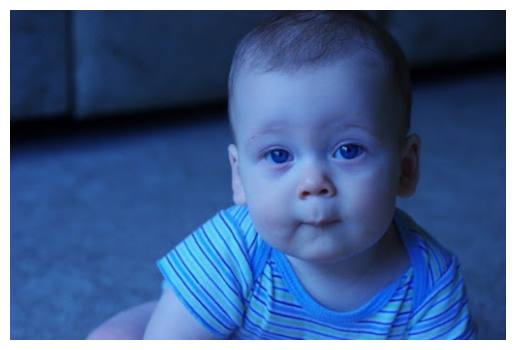

In [4]:
import base64
import numpy as np
import cv2
import matplotlib.pyplot as plt

img_bytes = base64.b64decode(imgstring)
img_array = np.frombuffer(img_bytes, dtype=np.uint8)
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")


In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

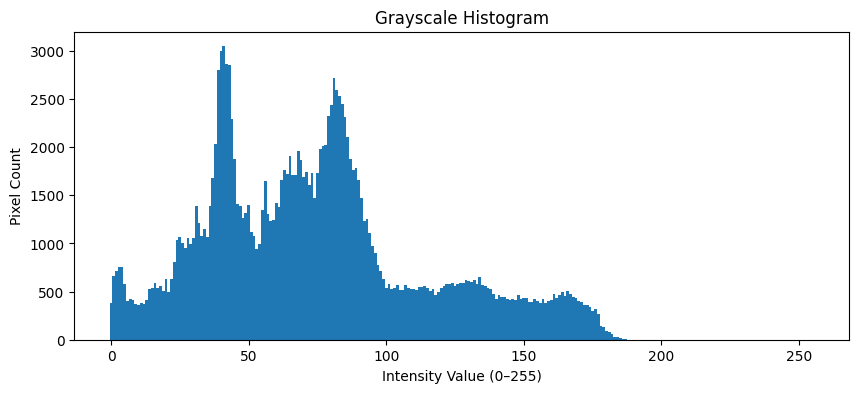

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def histogram(gray):
    hist = np.zeros(256, dtype=np.int64)
    rows, cols = gray.shape
    for r in range(rows): #just a normal counting loop
        for c in range(cols):
            intensity = int(gray[r, c])
            hist[intensity] += 1
    return hist
gray = (0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]).astype(np.uint8)
hist = histogram(gray)

plt.figure(figsize=(10, 4))
plt.bar(np.arange(256), hist, width=1.0)
plt.title("Grayscale Histogram")
plt.xlabel("Intensity Value (0–255)")
plt.ylabel("Pixel Count")
plt.show()

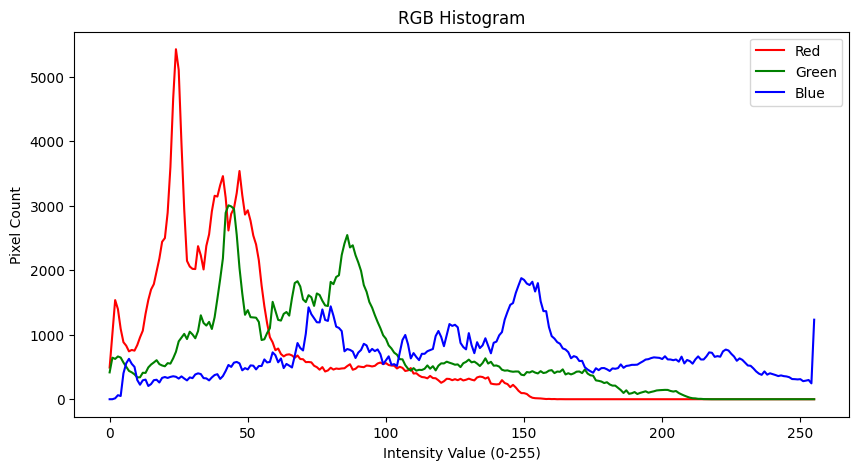

In [9]:
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]
hist_R = histogram(R)
hist_G = histogram(G)
hist_B = histogram(B)
x = np.arange(256)
plt.figure(figsize=(10,5))
plt.plot(x, hist_R, color='r', label='Red')
plt.plot(x, hist_G, color='g', label='Green')
plt.plot(x, hist_B, color='b', label='Blue')
plt.title("RGB Histogram")
plt.xlabel("Intensity Value (0-255)")
plt.ylabel("Pixel Count")
plt.legend()
plt.show()

#as we can see, red has very less contribution, only pixels with low red value are high in number
# green has moderate contribution
#the image is blue tinted as very high blue values are there in significant number over red and green

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [12]:
def rgb_to_hsv(img):
  img = img.astype(np.float32)
  R = img[:,:,0] / 255.0
  G = img[:,:,1] / 255.0
  B = img[:,:,2] / 255.0 #normalising

  Cmax = np.max(img[:,:,0:3], axis=2) / 255.0
  Cmin = np.min(img[:,:,0:3], axis=2) / 255.0#finding max and min of the three channels per pixel

  diff = Cmax - Cmin#chroma difference

  H = np.zeros_like(Cmax)

  mask_r = (Cmax == R) & (diff != 0)
  mask_g = (Cmax == G) & (diff != 0)
  mask_b = (Cmax == B) & (diff != 0) #to check which channel is maximum

  H[mask_r] = 60 * (((G[mask_r] - B[mask_r]) / diff[mask_r]) % 6)
  H[mask_g] = 60 * (((B[mask_g] - R[mask_g]) / diff[mask_g]) + 2)
  H[mask_b] = 60 * (((R[mask_b] - G[mask_b]) / diff[mask_b]) + 4) #from formula

  H = H / 2 #because opencv stores from 0 to 179

  S = np.zeros_like(Cmax)
  S[Cmax != 0] = (diff[Cmax != 0] / Cmax[Cmax != 0]) * 255 #for all pixels where cmax is not zero, compute saturation using diff/cmax, convert it to 0–255 scale, and store it in S. For pixels where cmax is zero, leave saturation as zero

  V = Cmax * 255 #scale value

  hsv = np.zeros_like(img, dtype=np.uint8)
  hsv[:,:,0] = H.astype(np.uint8)
  hsv[:,:,1] = S.astype(np.uint8)
  hsv[:,:,2] = V.astype(np.uint8) #compile final hsv together

  return hsv


In [13]:
hsv_custom = rgb_to_hsv(img)
rgb_verification = cv2.cvtColor(hsv_custom, cv2.COLOR_HSV2RGB)

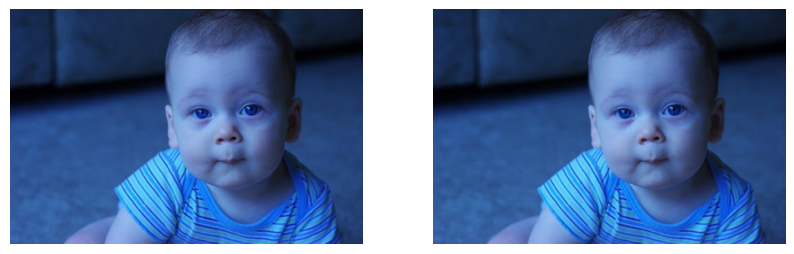

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].imshow(img)
ax[0].axis("off")

ax[1].imshow(rgb_verification)
ax[1].axis("off")

plt.show()

#yay both images are same

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

In [40]:
# I am very sorry for the delay. but please allow me to submit this one question after some time. I have some ideas and want to explore them in detail with some more time.
# Please do not let this have an impact on the evaluation of the rest of this assignment and assignment 1. I have really worked very hard on them.
# sincere apologies for the inconvinience caused
# i realise i spent too much time learning the theory that i couldnt give ample time to this assignment.
# please excuse me. Thank you. I will submit my solution ASAP.

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

In [22]:
def white_patch_balance(img_rgb):
  R = img_rgb[:,:,0].astype(np.float32)
  G = img_rgb[:,:,1].astype(np.float32)
  B = img_rgb[:,:,2].astype(np.float32)

  Rmax = np.max(R)
  Gmax = np.max(G)
  Bmax = np.max(B)

  R_bal = (255.0 / Rmax)
  G_bal = (255.0 / Gmax)
  B_bal = (255.0 / Bmax) #scaling factors

  height, width = img_rgb.shape[:2]
  out_list = []

  for i in range(height): #to create output image
      row = []
      for j in range(width):
          r_bal = int(min(R[i, j] * R_bal, 255))
          g_bal = int(min(G[i, j] * G_bal, 255))
          b_bal = int(min(B[i, j] * B_bal, 255))
          row.append([r_bal, g_bal, b_bal])
      out_list.append(row)

  out = np.array(out_list, dtype=np.uint8)
  return out

In [23]:
wb = white_patch_balance(img)

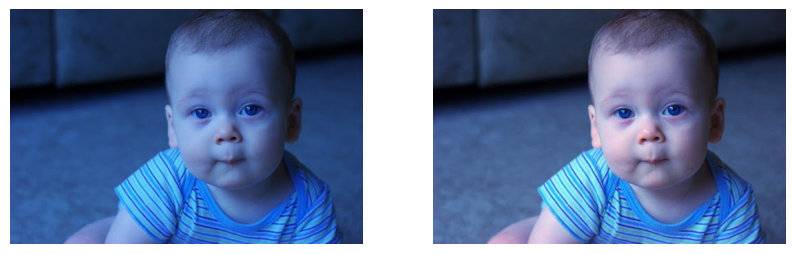

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].imshow(img)
ax[0].axis("off")

ax[1].imshow(wb)
ax[1].axis("off")

plt.show()

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [25]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

(np.float64(-0.5), np.float64(468.5), np.float64(611.5), np.float64(-0.5))

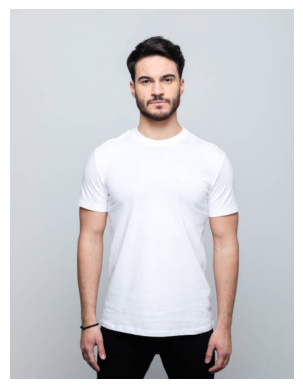

In [26]:
import base64
import numpy as np
import cv2
import matplotlib.pyplot as plt

img_bytes2 = base64.b64decode(imgstring2)
img_array2 = np.frombuffer(img_bytes2, dtype=np.uint8)
img2 = cv2.imdecode(img_array2, cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img2)
plt.axis("off")

In [31]:
#unfortunately didnt read the question properly and deleted my experiments
#the template of the function has always been this way only
#i tried playing with the scaling factor like 0.32 and how the factor should be
#i figured that we must have something 2 times the value input as we are dealing in units of 0.5
#for the changes to be continuous at 0.5, when value is 0.5 both factors should not show any changes
# used chatgpt for np.stack
# took some help from chatgpt to realise the factor to be near scaling factor to be near 0.3
# hope you like it

def white_balance(img_rgb, value):
    img = img_rgb.astype(np.float32)
    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]

    if value < 0.5:
        factor = 1 - 2*value
        r_adj = r * (1 - 0.32*factor)
        b_adj = b * (1 + 0.32*factor)
    else:
        factor = 2*(value - 0.5)
        r_adj = r * (1 + 0.32*factor)
        b_adj = b * (1 - 0.32*factor)

    out = np.stack([r_adj, g, b_adj], axis=2)
    out = np.clip(out, 0, 255).astype(np.uint8)
    return out

In [32]:
cold_img = white_balance(img2, 0)
original_img = white_balance(img2, 0.5)
warm_img = white_balance(img2, 1)

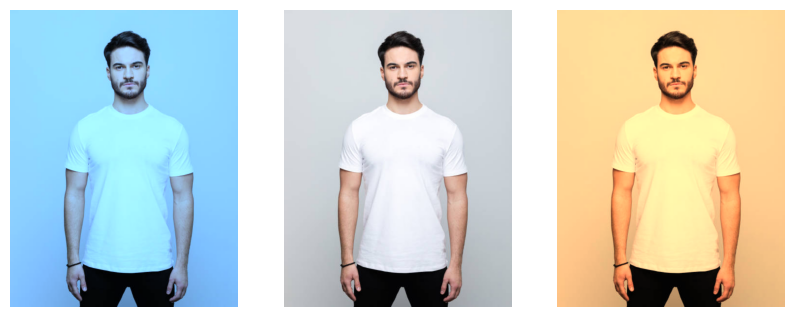

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

ax[0].imshow(cold_img)
ax[0].axis("off")

ax[1].imshow(original_img)
ax[1].axis("off")

ax[2].imshow(warm_img)
ax[2].axis("off")

plt.show()